# Business Understanding
As data science students, we place much of our faith in the ability of technology to shape a more knowledgeable, ethical, and prosperous world. In the past decade, most countries were faced with an increasing number of Internet users. With easier access, the Internet has become an integral part of our lives. However, many communities around the world lack access to computers and the internet. The San Diego Foundation of September 19, 2020 defines the digital divide as threefold: an economic divide, a usability divide, and an empowerment divide. The digital divide doesn’t just describe an inequity in basic access to technology; in our rapidly developing world, it also encompasses the technical and financial ability to make full use of available technology, taking into consideration access (or lack of access) to the internet.



According to the Office of Policy Development & Research of 2016, lack of high-speed internet access can negatively impact economic growth, household income, educational performance, healthcare access, and employment searches. It is clear that internet access plays a big role in one’s well being. However, there are opposite voices with the growing number of researches on Internet addiction saying that Internet usage caused psychosocial disorder. They claim that internet usage creates  a heightened level of psychological arousal, resulting in little sleep, failure to eat for long periods, and limited physical activity, possibly leading to the user experiencing physical and mental health problems such as depression, OCD, low family relationships and anxiety.


So, we decided to analyze data about internet access and various wellness aspects in a number of countries to answer the following question: **How does access to the internet affect a country’s overall quality of life/ happiness?** We want to see whether internet plays a positive impact more to people's life or negative impact is more dominant.

Although many studies have been conducted regarding the rural-urban digital divide in the United States, we are interested in the global impact of internet access. This analysis could help us identify whether it is worth investing in infrastructure that will provide high-speed internet access across the world, or if the presence of the internet is more detrimental than helpful.




# Data Understanding
In order to obtain insight on our question of how access to the internet affects a country’s quality of life, we used two main datasets. The first dataset, World Happiness Report, is a survey of the state of global happiness publiced by the Sustainable Development Solutions Network. The Report is written by a group of independent experts acting in their personal capacities. Any views expressed in this report do not necessarily reflect the views of any organization, agency or program of the United Nations. This particular dataset compiles data from 2005 to 2020, although not every country has values for every year. Each country’s happiness score is based on answers to the Gallup World Poll. The dataset also calculates the extent to which six factors (GDP, social support, life expectancy, freedom to make life choices, generosity, and perception of corruption) contribute to a country’s happiness score.

The latter dataset, which is from the International Telecommunication Union (ITU), describes the percentage of population in a given country who are using the internet. This dataset spans from 2000 to 2019, but, as with the former dataset, some countries do not have values for certain years. ITU is a UN specialized agency for global ICT (Information Communication Technology) statistics. These percentages were provided by internet providers in the specific countries. We will use these two datasets to investigate the impact that internet access has on various metrics of well-being.

After filtering the data by removing the irrelevant attributes to our analysis, we ended up with the following attributes:


In [ ]:
#@title World Happiness Project Data 
#Create the definition table for the definition of and data type.
import plotly.graph_objects as go

headerColor = 'slateblue'
rowEvenColor = 'lavender'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  columnorder = [1,2,3,4],
  columnwidth = [70,40,340,40],
  header=dict(
    values=['<b>Attribute</b>','<b>Data Type</b>','<b>Description</b>','<b>Nullable</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=11)
  ),
  cells=dict(
    values=[
      ['Country name','Year','Life Ladder','Log GDP per capita','Social Support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of Corruption','Positive Affect','Negative Affect'],
      ['Nominal','Interval','Ordinal','Ratio','Ordinal','Ratio','Ordinal','Ordinal','Ordinal','Ordinal','Ordinal'],
      ['Indicates country this data is collected from','Indicates year this data is collected from',
       'Overall Happiness Score (Variable name Life Ladder). National average response to life evaluation question: Please imagine a ladder with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?',
      'Measures the total monetary value of all final goods and services produced throughout a year per person per country. Logarithmic GDP per capita means every step up the y-axis is an identical percent change in real GDP per capita. Log GDP per capita is an indicator of economic growth.',
'Having someone to count on in times of trouble (Social Support) is the national average of binary (0-1) responses to the question: If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?','Indicates life expectancy. This number is extracted from WHO data.','National average of binary responses to the question: Are you satisfied or dissatisfied with your freedom to choose what to do with your life?','Residual regression of national average in response to the following question on GDP per capita: Have you donated money to a charity in the past month? ','National average of survey responses to two binary questions: Is corruption widespread throughout the government or not? Is corruption widespread throughout businesses or not. ','National average of three positive affect measures: happiness, laugh, and enjoyment. Based on the following questions: Did you experience the following feelings during a lot of the day yesterday? How about happiness? Did you smile or laugh? How about enjoyment?' ,'National average of three negative affect measures: worry, sadness, anger. Questions: Did you experience the following feelings during a lot of the day yesterday? How about sadness? How about worry? How about anger?'],
      ['No','No','No','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes']],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor]*3],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()


In [ ]:
#@title ITU internet access data { display-mode: "both" }
headerColor = 'chocolate'
rowEvenColor = 'peachpuff'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  columnorder = [1,2,3,4],
  columnwidth = [70,50,200,50],
  header=dict(
    values=['<b>Attribute</b>','<b>Data Type</b>','<b>Description</b>','<b>Nullable</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['Country','Years (2000-2019)','percent'],
      ['Nominal','Interval','Ratio'],
      ['Indicates country this data is collected from','Indicates year this data is collected from','Percent of individuals using the internet in a given country in a given year.'],
      ['No','No','Yes']],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor]*3],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11),
    height=50
    ))
])

fig.show()

# Data Preparation
Both data sets were downloaded from Kaggle.com. Unnecessary columns were removed from the ITU data set such as “notes” and “source” columns which had limited applicable data. Then, we  merge the World Happiness Project data with the ITU data on country and year and save it as a csv named merged_data.csv.csv. We used this csv file as the starting point for our data collecting, managing, summarizing, visualizing, and analysing, following the rules of Principles of Data Visualization. 




In [ ]:
#first connected to the google drive to access the csv file we downloaded into our drive folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following two datasets are the original one we get from Kaggle. We need to load it into pandas dataframe.

In [ ]:
import pandas as pd
happ = pd.read_csv('/content/drive/MyDrive/DS 201 Lab 1/Final Project/Datasets/happiness index.csv')
internet = pd.read_excel('/content/drive/MyDrive/DS 201 Lab 1/Final Project/Datasets/Book2.xlsx')

Display the two dataframes to get a grasp of what our datasets look like:

In [ ]:
# World Happiness Project Dataset
happ

Country name  year  ...  Positive affect  Negative affect
0     Afghanistan  2008  ...            0.518            0.258
1     Afghanistan  2009  ...            0.584            0.237
2     Afghanistan  2010  ...            0.618            0.275
3     Afghanistan  2011  ...            0.611            0.267
4     Afghanistan  2012  ...            0.710            0.268
...           ...   ...  ...              ...              ...
1944     Zimbabwe  2016  ...            0.738            0.209
1945     Zimbabwe  2017  ...            0.806            0.224
1946     Zimbabwe  2018  ...            0.710            0.212
1947     Zimbabwe  2019  ...            0.716            0.235
1948     Zimbabwe  2020  ...            0.703            0.346

[1949 rows x 11 columns]

In [ ]:
#ITU internet access dataset
internet

Country       2000       2001  ...       2017       2018       2019
0            Afghanistan        NaN   0.004723  ...        NaN        NaN        NaN
1                Albania   0.114097   0.325798  ...  62.400000  65.400000  68.550391
2                Algeria   0.491706   0.646114  ...  47.691055  49.038468  57.500000
3                Andorra  10.538836        NaN  ...  91.567467        NaN        NaN
4                 Angola   0.105046   0.136014  ...  32.000000  35.000000  36.000000
..                   ...        ...        ...  ...        ...        ...        ...
221  Virgin Islands (US)  13.815081  18.375766  ...  64.377494        NaN        NaN
222    Wallis and Futuna   4.768068   5.092687  ...        NaN        NaN        NaN
223                Yemen   0.082500   0.090802  ...  26.718355        NaN        NaN
224               Zambia   0.191072   0.233130  ...        NaN  14.299997  19.000000
225             Zimbabwe   0.401434   0.799846  ...  24.400000  25.000000  25.100000

[226 rows x 20 columns]

The ITU internet access dataset has year from 2000 to 2019 in the header and the internet access percent is in the corresponding cell of the country and year. Since we want to gain some insights from how internet accessibility affect overall happiness and life quality, we need to merge the two datasets together to do further analysis. According to the principle of transformation, we need to structure our dataframe better before merging dataframes together. The first step we need to do is to convert the ITU internet access to a relational table that has internet access and year as an attribute.

In [ ]:
# melt the internet dataset 
Intern=pd.melt(internet, id_vars=['Country'])
Intern

Country variable      value
0             Afghanistan     2000        NaN
1                 Albania     2000   0.114097
2                 Algeria     2000   0.491706
3                 Andorra     2000  10.538836
4                  Angola     2000   0.105046
...                   ...      ...        ...
4289  Virgin Islands (US)     2019        NaN
4290    Wallis and Futuna     2019        NaN
4291                Yemen     2019        NaN
4292               Zambia     2019  19.000000
4293             Zimbabwe     2019  25.100000

[4294 rows x 3 columns]

In [ ]:
# change the name of each head title and add a column indicating the percent column is for internet accessibility
df = Intern.set_axis(['Country', 'year', 'percent'], axis=1, inplace=False)
df1 = df.assign(Indicator='Internet users (%)')
df1


Country  year    percent           Indicator
0             Afghanistan  2000        NaN  Internet users (%)
1                 Albania  2000   0.114097  Internet users (%)
2                 Algeria  2000   0.491706  Internet users (%)
3                 Andorra  2000  10.538836  Internet users (%)
4                  Angola  2000   0.105046  Internet users (%)
...                   ...   ...        ...                 ...
4289  Virgin Islands (US)  2019        NaN  Internet users (%)
4290    Wallis and Futuna  2019        NaN  Internet users (%)
4291                Yemen  2019        NaN  Internet users (%)
4292               Zambia  2019  19.000000  Internet users (%)
4293             Zimbabwe  2019  25.100000  Internet users (%)

[4294 rows x 4 columns]

In [ ]:
# Switch the column of Indicator in front of percent to make the dataframe more readable
titles=list(df1.columns)
titles[2],titles[3]=titles[3],titles[2]
df1=df1[titles]
df1

Country  year           Indicator    percent
0             Afghanistan  2000  Internet users (%)        NaN
1                 Albania  2000  Internet users (%)   0.114097
2                 Algeria  2000  Internet users (%)   0.491706
3                 Andorra  2000  Internet users (%)  10.538836
4                  Angola  2000  Internet users (%)   0.105046
...                   ...   ...                 ...        ...
4289  Virgin Islands (US)  2019  Internet users (%)        NaN
4290    Wallis and Futuna  2019  Internet users (%)        NaN
4291                Yemen  2019  Internet users (%)        NaN
4292               Zambia  2019  Internet users (%)  19.000000
4293             Zimbabwe  2019  Internet users (%)  25.100000

[4294 rows x 4 columns]

After converting the internet dataframe, we can merge it with the world happiness dataframe based on year and country. We saved the merge dataframe into a separate csv called merged_data - merged_data.csv.csv for future analysis.

In [ ]:
# merge the two dataframes together

# export the merged dataframe as a csv

In [ ]:
# load the merged dataframe from google drive
a=pd.read_csv('/content/drive/MyDrive/DS 201 Lab 1/Final Project/merged_data - merged_data.csv.csv')
a

Country  year  ...           Indicator  percent
0     Afghanistan  2008  ...  Internet users (%)     1.84
1     Afghanistan  2009  ...  Internet users (%)     3.55
2     Afghanistan  2010  ...  Internet users (%)     4.00
3     Afghanistan  2011  ...  Internet users (%)     5.00
4     Afghanistan  2012  ...  Internet users (%)     5.45
...           ...   ...  ...                 ...      ...
1657     Zimbabwe  2015  ...  Internet users (%)    22.74
1658     Zimbabwe  2016  ...  Internet users (%)    23.12
1659     Zimbabwe  2017  ...  Internet users (%)    24.40
1660     Zimbabwe  2018  ...  Internet users (%)    25.00
1661     Zimbabwe  2019  ...  Internet users (%)    25.10

[1662 rows x 13 columns]

First, let' s take a look at the summary statistics of the dataframe. 

In [ ]:
a.describe(include='all')

Country         year  ...           Indicator      percent
count     1662  1662.000000  ...                1662  1561.000000
unique     147          NaN  ...                   1          NaN
top     Canada          NaN  ...  Internet users (%)          NaN
freq        14          NaN  ...                1662          NaN
mean       NaN  2012.871239  ...                 NaN    44.111755
std        NaN     3.977090  ...                 NaN    30.196441
min        NaN  2005.000000  ...                 NaN     0.230000
25%        NaN  2010.000000  ...                 NaN    15.000000
50%        NaN  2013.000000  ...                 NaN    43.680000
75%        NaN  2016.000000  ...                 NaN    71.000000
max        NaN  2019.000000  ...                 NaN    99.700000

[11 rows x 13 columns]

There are in total 1662 tuples. The data is from year 2005 to year 2019. The last two rows are data for internet accessibility. The attribute genorisity is residual regression on national average so it has negative number. The Healthy.life.expectancy.at.birth is surveyed on a scale of 0-100. The Log.GDP.per.capita is the log number showing the growth. Among all the attributes, Social.support, Freedom.to.make.life choices, Perceptions.of.corruption, Positive.affect, and Negative.affect have value ranges within 0 and 1 because they have a yes or no question asked in the survey, for example, for the survey about social support, the binary (0-1) question of will you have relative or friend to help you when you need them is asked. Then for these attributes, the national average of each year is taken based on the binary responses. Life Ladder is rated on 0-10. The minimum number in the merged dataset is around 2 and maximum is around 8 because the result number is showing the national average. It doesn't represent nobody is rating a 10 or 0 in the survey, meaning there are still people thinking the this is the best or worst possible life they could have but the national average highest instance is around 8 and lowest around 2. 

Now let's take a look at how many NAN values there are for each attribute to decide whether we should delete the whole row to clean the data.

In [ ]:
# define a function to count the missing value
def countna():
  count_nan = a['percent'].isna().sum()
  print ('Count of NaN for internet accessibility: ' + str(count_nan))

  count_nan = a['Log.GDP.per.capita'].isna().sum()
  print ('Count of NaN of GDP: ' + str(count_nan))

  count_nan = a['Life.Ladder'].isna().sum()
  print ('Count of NaN of life ladder: ' + str(count_nan))

  count_nan = a['Social.support'].isna().sum()
  print ('Count of NaN of Social.support: ' + str(count_nan))

  count_nan = a['Healthy.life.expectancy.at.birth'].isna().sum()
  print ('Count of NaN of health life expectancy at birth: ' + str(count_nan))

  count_nan = a['Freedom.to.make.life.choices'].isna().sum()
  print ('Count of NaN of Freedom to make life choices	: ' + str(count_nan))

  count_nan = a['Generosity'].isna().sum()
  print ('Count of NaN of generosity: ' + str(count_nan))

  count_nan = a['Perceptions.of.corruption'].isna().sum()
  print ('Count of NaN of perceptions of corruption: ' + str(count_nan))

  count_nan = a['Positive.affect'].isna().sum()
  print ('Count of NaN of positive affect: ' + str(count_nan))

  count_nan = a['Negative.affect'].isna().sum()
  print ('Count of NaN of negative affect: ' + str(count_nan))

countna()

Count of NaN for internet accessibility: 101
Count of NaN of GDP: 12
Count of NaN of life ladder: 0
Count of NaN of Social.support: 12
Count of NaN of health life expectancy at birth: 13
Count of NaN of Freedom to make life choices	: 27
Count of NaN of generosity: 59
Count of NaN of perceptions of corruption: 98
Count of NaN of positive affect: 20
Count of NaN of negative affect: 14


The attributes that have the most NA values is the "percent" attribute. It has 101 NA. However, this attribute is the main attribute that we want to work on to solve the problem we have. So we decide to delete all of the rows that have NA values in internet accessbility--- the "percent" column. Then let's see how other attributes' NA decreases after this. Life Ladder is another main attribute that we want to explore, it has 0 NA value which is great.

In [ ]:
a.dropna(subset = ["percent"], inplace=True)
countna()

Count of NaN for internet accessibility: 0
Count of NaN of GDP: 8
Count of NaN of life ladder: 0
Count of NaN of Social.support: 12
Count of NaN of health life expectancy at birth: 2
Count of NaN of Freedom to make life choices	: 24
Count of NaN of generosity: 54
Count of NaN of perceptions of corruption: 93
Count of NaN of positive affect: 16
Count of NaN of negative affect: 11


Now after deleting all rows with NA in "percent", let's take a look at each attribute's distribution to decide how to add value to the NAN cell. There's not a lot of missing values in Log.GDP.per.capita, Social.support, Healthy.life.expectancy.at.birth, Positive.affect, and Negative.affect. We decide to add mean or median value to the missing value. Corruptions and generosity still has a larger amount of missing value. Let's take a look at each attribute's distribution to gain greater insight into the data.

## Distribution for each parameter

In [ ]:
# Import seaborn and apply its plotting styles
import seaborn as sns
import numpy as np
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



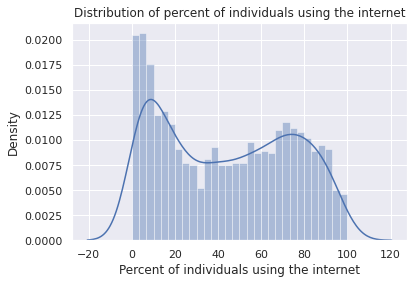

In [ ]:
d1 = sns.distplot(a['percent'],bins=30);
d1.set(title='Distribution of percent of individuals using the internet', xlabel = 'Percent of individuals using the internet');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



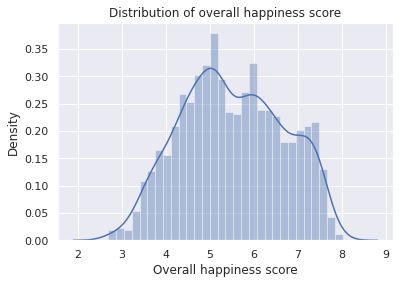

In [ ]:
d2 = sns.distplot(a['Life.Ladder'],bins=30);
d2.set(title='Distribution of overall happiness score', xlabel = 'Overall happiness score');

The attribute "percent" and attribute "Life.Ladder" doesn't have nan value so we don't have to worry about it. From distributions, we can see that there are more instances of extreme low internet accessibility (<10%) and less instances with extreme high internet connectivity (closer to 100%). Life.Ladder is relatively more sysmetric with the highest density around the median.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



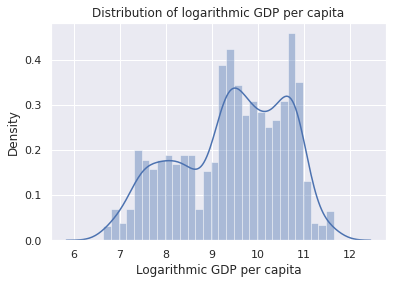

In [ ]:
d3 = sns.distplot(a['Log.GDP.per.capita'],bins=30);
d3.set(title='Distribution of logarithmic GDP per capita', xlabel = 'Logarithmic GDP per capita');

In [ ]:
a['Log.GDP.per.capita'].mean()

9.421620734063094

In [ ]:
a['Log.GDP.per.capita'].median()

9.555

From the distribution and the printed mean and median, we can see that most of the value falls in the 9 to 11 range and the difference between mean and median is very small. So we decide to add median for the eight missing values of GDP.

In [ ]:
# replace nan value in gdp column with median
import numpy as np
a['Log.GDP.per.capita'].fillna(value=a['Log.GDP.per.capita'].median(), inplace=True)
countna()

Count of NaN for internet accessibility: 0
Count of NaN of GDP: 0
Count of NaN of life ladder: 0
Count of NaN of Social.support: 12
Count of NaN of health life expectancy at birth: 2
Count of NaN of Freedom to make life choices	: 24
Count of NaN of generosity: 54
Count of NaN of perceptions of corruption: 93
Count of NaN of positive affect: 16
Count of NaN of negative affect: 11


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



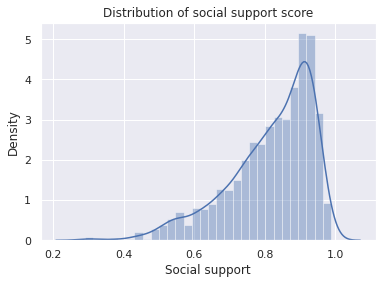

In [ ]:
d4 = sns.distplot(a['Social.support'],bins=30);
d4.set(title='Distribution of social support score', xlabel = 'Social support');

The distribution for social.support is skewed to the right. So it will be better to fill in the value with mean than median.

In [ ]:
a['Social.support'].fillna(value=a['Social.support'].mean(), inplace=True)
countna()

Count of NaN for internet accessibility: 0
Count of NaN of GDP: 0
Count of NaN of life ladder: 0
Count of NaN of Social.support: 0
Count of NaN of health life expectancy at birth: 2
Count of NaN of Freedom to make life choices	: 24
Count of NaN of generosity: 54
Count of NaN of perceptions of corruption: 93
Count of NaN of positive affect: 16
Count of NaN of negative affect: 11


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



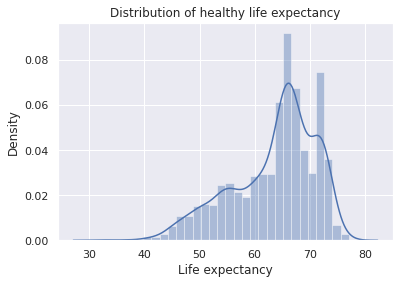

In [ ]:
d5 = sns.distplot(a['Healthy.life.expectancy.at.birth'],bins=30);
d5.set(title='Distribution of healthy life expectancy', xlabel = 'Life expectancy');

There are only two missing values for healthy life expectancy and the distribution is slightly rightly skewed so we decide to add the mean value.

In [ ]:
a['Healthy.life.expectancy.at.birth'].fillna(value=a['Healthy.life.expectancy.at.birth'].mean(), inplace=True)
countna()

Count of NaN for internet accessibility: 0
Count of NaN of GDP: 0
Count of NaN of life ladder: 0
Count of NaN of Social.support: 0
Count of NaN of health life expectancy at birth: 0
Count of NaN of Freedom to make life choices	: 24
Count of NaN of generosity: 54
Count of NaN of perceptions of corruption: 93
Count of NaN of positive affect: 16
Count of NaN of negative affect: 11


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



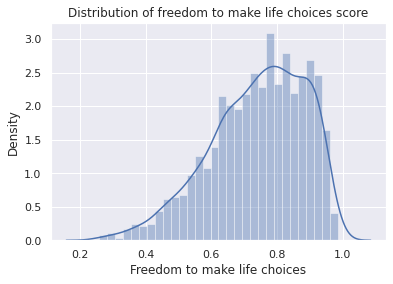

In [ ]:
d6 = sns.distplot(a['Freedom.to.make.life.choices'],bins=30);
d6.set(title='Distribution of freedom to make life choices score', xlabel = 'Freedom to make life choices');

The distribution for Freedom.to.make.life.choices	is slightly skewed to the right but it's very close to a normal distribution so we will use mean value to replace nan.

In [ ]:
a['Freedom.to.make.life.choices'].fillna(value=a['Freedom.to.make.life.choices'].mean(), inplace=True)
countna()

Count of NaN for internet accessibility: 0
Count of NaN of GDP: 0
Count of NaN of life ladder: 0
Count of NaN of Social.support: 0
Count of NaN of health life expectancy at birth: 0
Count of NaN of Freedom to make life choices	: 0
Count of NaN of generosity: 54
Count of NaN of perceptions of corruption: 93
Count of NaN of positive affect: 16
Count of NaN of negative affect: 11


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



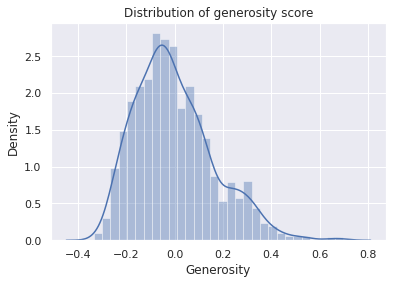

In [ ]:
d7 = sns.distplot(a['Generosity'],bins=30);
d7.set(title='Distribution of generosity score', xlabel = 'Generosity');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



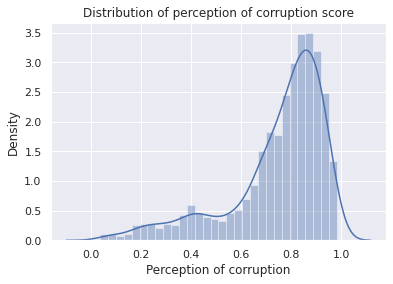

In [ ]:
d8 = sns.distplot(a['Perceptions.of.corruption'],bins=30);
d8.set(title='Distribution of perception of corruption score', xlabel = 'Perception of corruption');

Generosity and Perception of corruption are missing more values than others. Generosity is slightly skewed to the left and Corruption is very skewed to the right. Since Generosity is only slightly skewed, the mean should be good enough to fill the missing values. For Corruption, since it's missing many values and skewed to the right more than others, we take a deeper look and find that the 50 percentile value maybe a better fit that mean as shown below.

In [ ]:
a['Perceptions.of.corruption'].quantile(0.5)

0.8055

In [ ]:
a['Perceptions.of.corruption'].mean()

0.7459965940054488

In [ ]:
a['Generosity'].fillna(value=a['Generosity'].mean(), inplace=True)
a['Perceptions.of.corruption'].fillna(value=a['Perceptions.of.corruption'].quantile(0.5), inplace=True)
countna()

Count of NaN for internet accessibility: 0
Count of NaN of GDP: 0
Count of NaN of life ladder: 0
Count of NaN of Social.support: 0
Count of NaN of health life expectancy at birth: 0
Count of NaN of Freedom to make life choices	: 0
Count of NaN of generosity: 0
Count of NaN of perceptions of corruption: 0
Count of NaN of positive affect: 16
Count of NaN of negative affect: 11


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



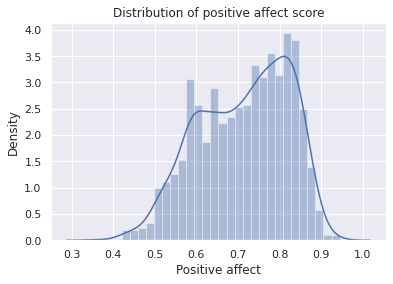

In [ ]:
d9 = sns.distplot(a['Positive.affect'],bins=30);
d9.set(title='Distribution of positive affect score', xlabel = 'Positive affect');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



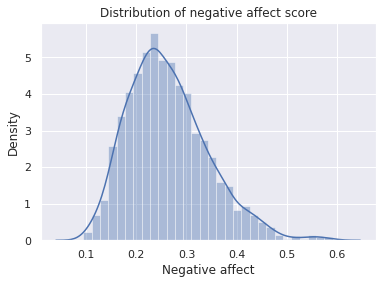

In [ ]:
d10 = sns.distplot(a['Negative.affect'],bins=30);
d10.set(title='Distribution of negative affect score', xlabel = 'Negative affect');

The negative and positive affect's distribution is only slightly skewed, there are less than twenty values missing so it should be good enough to fill in mean value.

In [ ]:
a['Negative.affect'].fillna(value=a['Negative.affect'].mean(), inplace=True)
a['Positive.affect'].fillna(value=a['Positive.affect'].mean(), inplace=True)
countna()

Count of NaN for internet accessibility: 0
Count of NaN of GDP: 0
Count of NaN of life ladder: 0
Count of NaN of Social.support: 0
Count of NaN of health life expectancy at birth: 0
Count of NaN of Freedom to make life choices	: 0
Count of NaN of generosity: 0
Count of NaN of perceptions of corruption: 0
Count of NaN of positive affect: 0
Count of NaN of negative affect: 0


Now we have no nan value in our dataset, we can move on to the next section.

# Modeling & Evaluating （EDA)

There are many different variables in this dataset and some may have unexpected relationships. The first order of business is to visualize the relationships between all variables in order to see if any of these unexpected relationships exist. We plot the correlation map below to see the correlation between each attribute. The lightest color show a strong positive correlation and the darkest color show a strong negative correlation.

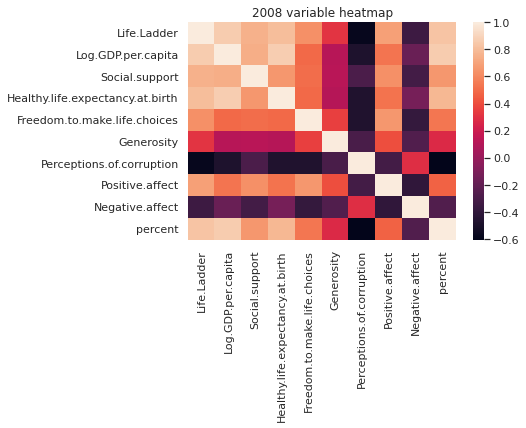

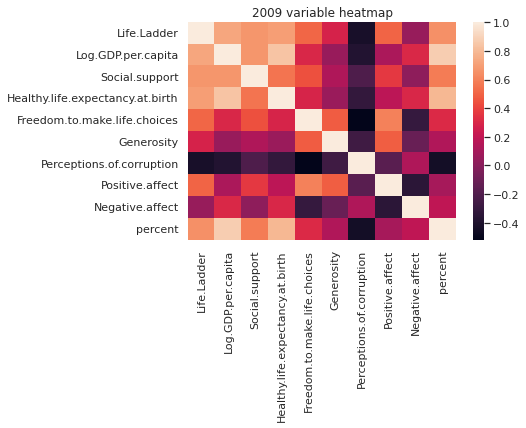

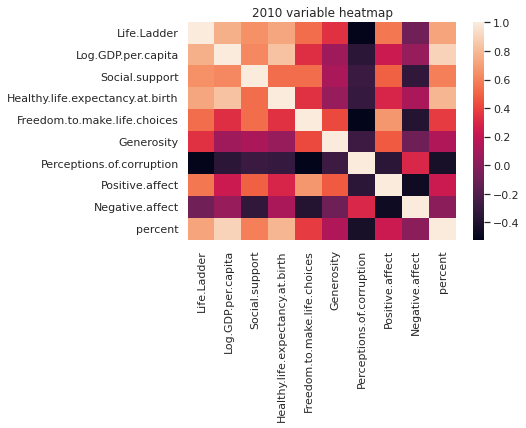

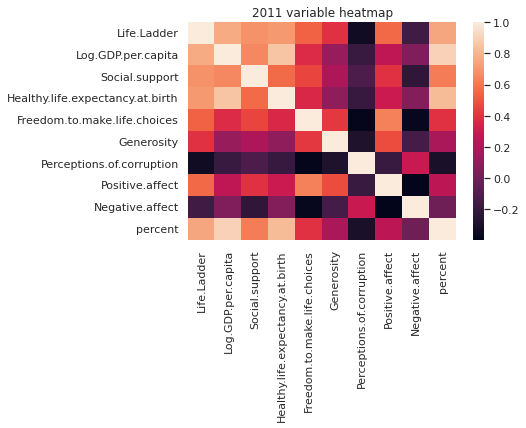

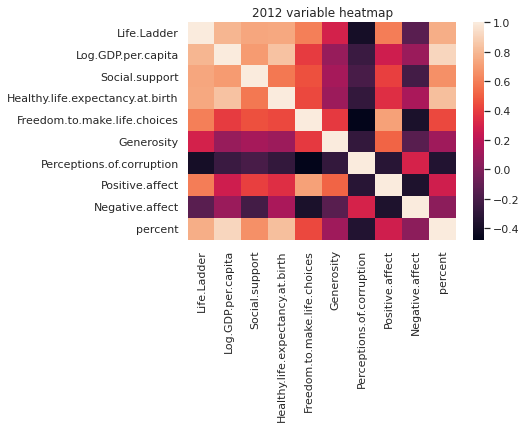

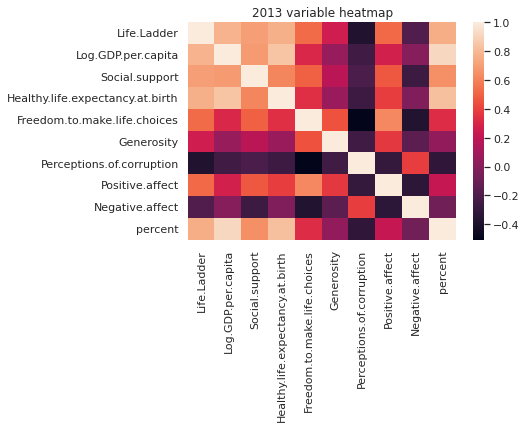

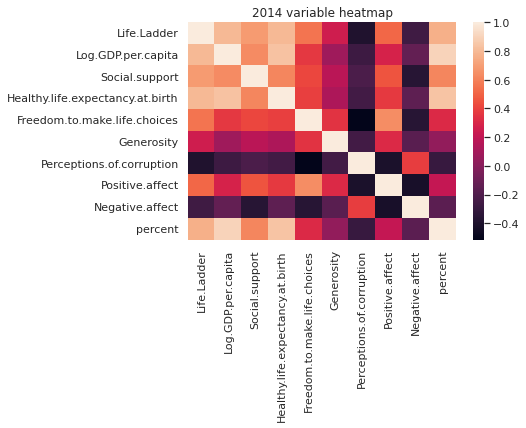

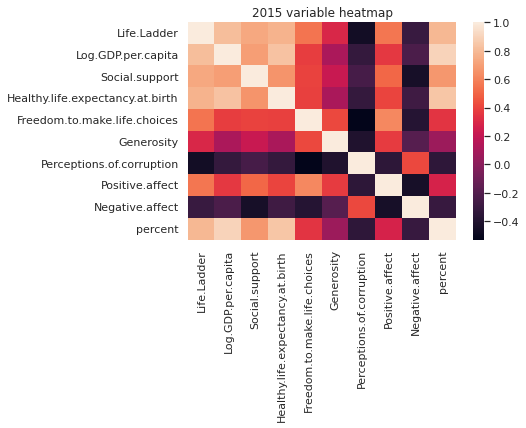

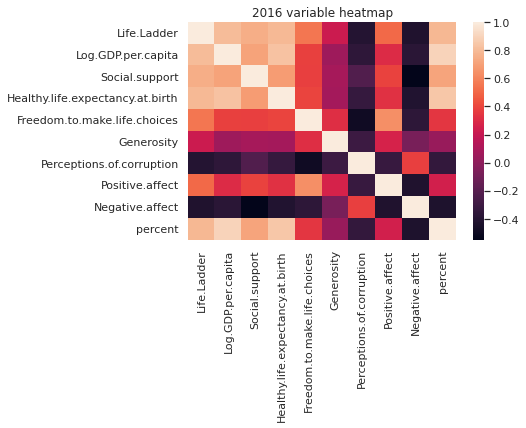

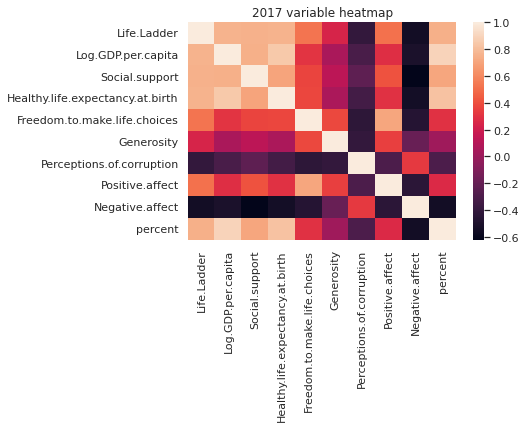

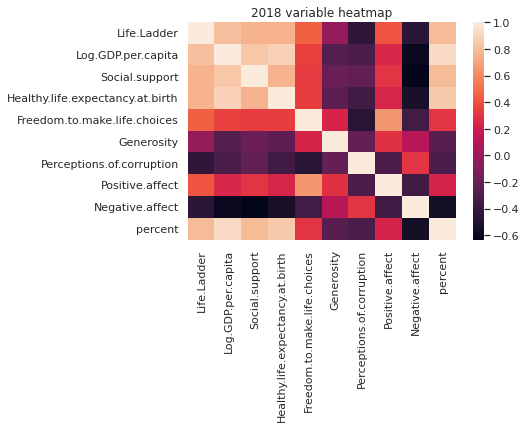

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
doi = a.drop(columns = ["Indicator", "Country"])

plots = []
for i in range(2008,2019):
  plt.figure()
  year_dat = doi[doi['year'] == i]
  year_dat = year_dat.drop(columns = ['year'])
  corr = year_dat.dropna().corr()
  sns.heatmap(corr).set(title = f"{i} variable heatmap")


One of the biggest correlations seems to be between percent of internet users and GDP. This is expected, as internet access can be expensive since it requires both a computer and a great deal of infrastructure. Life Ladder, Healthy life expectancy, and social support also seem to have strong correlation with percent. There's an interesting pattern that Life Ladder and social support seem to be more and more positively correlated to internet percent and gdp and healthy life expectancy are strongly correlated to internet access percent all the time. There's another interesting pattern here that the internet accessibility "percent" varaible has stronger negative correlation with the negative affect and stronger positive correlation with the positive affect over the year. However, overall the positive correlation between positive affect and percent is weaker than the negative correlation between  negative affect and correlation. Interestingly the plot in earlier years show a strong negative correlation between internet use and perceptions of corruption, however the strength of this correlation seems to diminish over the year. 

## Statistical Analysis

We will do statistical test on each year's data so that our data is only panel data. We will calculate the pearson correlation coefficient value for each year and plot it out. We will see the trend of how the statistical test result over time. The pearson correlation coefficient (r value) measures the strength of correlation and the direction of correlation. p value tells whether we should reject our test assumption or not.

In [ ]:
# So here we're going to do a bunch of Pearson correlation tests between 
# variables of interest to further draw out any interesting relationships
import scipy as sp
# initialize arrays for test results for r value
corr_tests = []
years = []
free_tests = []
gdp_tests = []
gdp_tests2 = []
gdp_per = []
neg_per = []
pos_per = []
life_per = []
# loop through years 2008-2019 in order to perform calulations by year
for i in range(2008,2019):
  years.append(i)
  year_dat = doi[doi['year'] == i].dropna()
  year_dat = year_dat.drop(columns = ['year'])
  corr_tests.append(
      sp.stats.pearsonr(year_dat['percent'],year_dat['Perceptions.of.corruption'])[0]
  )
  free_tests.append(sp.stats.pearsonr(year_dat['percent'],year_dat['Freedom.to.make.life.choices'])[0])
  gdp_tests.append(sp.stats.pearsonr(year_dat['Log.GDP.per.capita'],year_dat['Freedom.to.make.life.choices'])[0])
  gdp_tests2.append(sp.stats.pearsonr(year_dat['Log.GDP.per.capita'],year_dat['Perceptions.of.corruption'])[0])
  gdp_per.append(sp.stats.pearsonr(year_dat['Log.GDP.per.capita'],year_dat['percent'])[0])
  neg_per.append(sp.stats.pearsonr(year_dat['Negative.affect'],year_dat['percent'])[0])
  pos_per.append(sp.stats.pearsonr(year_dat['Positive.affect'],year_dat['percent'])[0])
  life_per.append(sp.stats.pearsonr(year_dat['Life.Ladder'],year_dat['percent'])[0])


In [ ]:
# So here we're going to do a bunch of Pearson correlation tests between 
# variables of interest to further draw out any interesting relationships

# this section calculates the p value 
pcorr_tests = []
pyears = []
pfree_tests = []
pgdp_tests = []
pgdp_tests2 = []
pgdp_per = []
pneg_per = []
ppos_per = []
plife_per = []
# loop through years 2008-2019 in order to perform calulations by year
for i in range(2008,2019):
  pyears.append(i)
  pyear_dat = doi[doi['year'] == i].dropna()
  pyear_dat = pyear_dat.drop(columns = ['year'])
  corr_tests.append(
      sp.stats.pearsonr(pyear_dat['percent'],pyear_dat['Perceptions.of.corruption'])[1]
  )
  pfree_tests.append(sp.stats.pearsonr(pyear_dat['percent'],pyear_dat['Freedom.to.make.life.choices'])[1])
  pgdp_tests.append(sp.stats.pearsonr(pyear_dat['Log.GDP.per.capita'],pyear_dat['Freedom.to.make.life.choices'])[1])
  pgdp_tests2.append(sp.stats.pearsonr(pyear_dat['Log.GDP.per.capita'],pyear_dat['Perceptions.of.corruption'])[1])
  pgdp_per.append(sp.stats.pearsonr(pyear_dat['Log.GDP.per.capita'],pyear_dat['percent'])[1])
  pneg_per.append(sp.stats.pearsonr(pyear_dat['Negative.affect'],pyear_dat['percent'])[1])
  ppos_per.append(sp.stats.pearsonr(pyear_dat['Positive.affect'],pyear_dat['percent'])[1])
  plife_per.append(sp.stats.pearsonr(pyear_dat['Life.Ladder'],pyear_dat['percent'])[1])


Our Null Hypothesis are: there is no correlation between GDP and internet 
access percent,there is no correlation between GDP and freedom to make life choices,there is no correlation between GDP and perception of corruption,there is no correlation between negative affect and internet access percent,there is no correlation between positve and internet access percent, and there is no correlation between life ladder and internet access percent.

Our Alternative Hypothesis are: there is correlation between GDP and internet 
access percent,there is correlation between GDP and freedom to make life choices,there is correlation between GDP and perception of corruption,there is correlation between negative affect and internet access percent,there is correlation between positve affect and internet access percent, and there is correlation between life ladder and internet access percent.

If we carry out the test at the 10% level, absolute value of p value needs to be smaller than 0.01 for p test to reject the null hypothesis at the 10% level produce 
statistically significant result. 

In [ ]:
dp = pd.DataFrame(list(zip(pyears,corr_tests,pfree_tests,pgdp_tests,pgdp_tests2,pgdp_per,pneg_per,ppos_per, plife_per)), columns =['Data in year','pvalue_perc_corrup', 'pvalue_perc_free','pvalue_gdp_free','pvalue_gdp_corrup','pvalue_gdp_perc','pvalue_neg_perc','pvalue_pos_perc','pvalue_life_perc'])
dp 

Data in year  pvalue_perc_corrup  ...  pvalue_pos_perc  pvalue_life_perc
0           2008           -0.607274  ...         0.000002      3.558431e-25
1           2009           -0.436511  ...         0.290825      3.965554e-13
2           2010           -0.425281  ...         0.012492      5.135494e-19
3           2011           -0.301632  ...         0.004212      3.011164e-24
4           2012           -0.341063  ...         0.002038      2.604265e-24
5           2013           -0.315513  ...         0.013039      7.590283e-24
6           2014           -0.294553  ...         0.015164      7.738197e-26
7           2015           -0.344068  ...         0.001945      1.466067e-27
8           2016           -0.342404  ...         0.005553      4.404142e-27
9           2017           -0.295159  ...         0.002744      8.262769e-24
10          2018           -0.309585  ...         0.020705      4.199708e-24

[11 rows x 9 columns]

From the p value table above, we can reject the null hypothesis at the 10% level for internet percent and freedom of life choice, gdp and freedom of life choice, gdp and corruption, gdp and internet percent, negative affect and internet percent, lifeladder and percent.

We fail to reject the null hypothesis for all the internet percent and corruption, most of the positive affect and percent.

Lets examine the relationship between GDP and internet use a little closer.

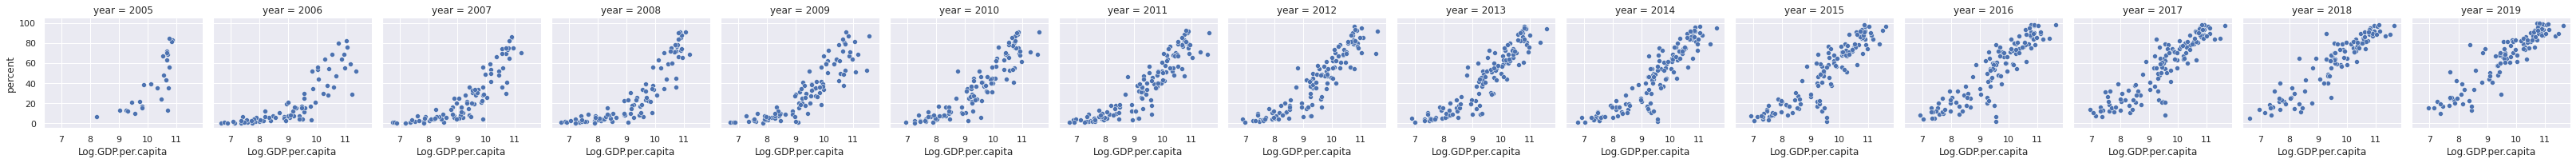

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



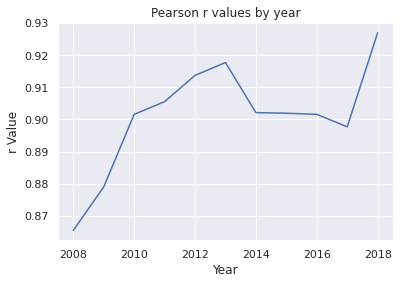

In [ ]:
g = sns.FacetGrid(a, col="year")
g.map(sns.scatterplot, 'Log.GDP.per.capita', "percent")
plt.show()
l = sns.lineplot(years, gdp_per)
plt.title("Pearson r values by year")

l.set_xlabel("Year")
l.set_ylabel("r Value")
plt.show()

It seems that  GDP and Internet Access have a very strong positive correlation. This relationship is a bit weaker in the earlier years, however it remains apparent that these are connected. Additionally, this relationship initially starts out looking like exponential growth that shifts to being linear over time. 

These results left us questioning whether GDP or Internet Access was the true driver for these outcomes. We chose to analyze the Pearson Correlation for GDP and Internet Access with Freedom to Make Life Choices to answer this question. We concluded that Internet Access and GDP are inextricable because each is more strongly correlated with things such as Freedom to Make Life Choices at different points in time. Ultimately, Internet Access and GDP further the other, and subsequently general happiness.

Then, we found the Pearson correlation for negative effect and life ladder with Internet Access. We found that Internet Access is inversely correlated with Negative Effect. We chose to analyze Negative Effect as it separates feelings of happiness from general life satisfaction, which is the focus of the life ladder. The second graph proves that Internet Access improves happiness and life satisfaction.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



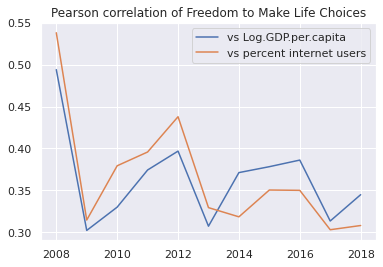

In [ ]:
sns.lineplot(years, gdp_tests)

sns.lineplot(years, free_tests)
plt.title("Pearson correlation of Freedom to Make Life Choices")
plt.legend(labels=['vs Log.GDP.per.capita','vs percent internet users'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



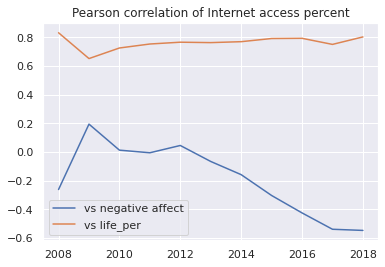

In [ ]:
sns.lineplot(years, neg_per)
sns.lineplot(years, life_per)
plt.title("Pearson correlation of Internet access percent")
plt.legend(labels=['vs negative affect','vs life_per'])

plt.show()

The great depression in 2008 seems to affect some of our variables. However, the test does show us some insights. We can see from the r value plot above that life ladder have a very strong correlation with internet percent since the r value is around 0.8. The negative affect and internet percent r value is having stronger correlation over time but the absolute value of r for negative affect with percent is still smaller than life ladder with percent.

## World Map for Internet Accessibility vs. Life Ladder

In [ ]:
%pip install pycountry

In [ ]:
# generate country code  based on country name 
import pycountry 

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
a['CODE']=alpha3code(a.Country)

In [ ]:
%pip install geopy

In [ ]:
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim()
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning:

Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



In [ ]:
%pip install geopandas

In [ ]:
import geopandas
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,a,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='percent',ascending=False).reset_index()


In [ ]:
# Group the data by year into separate dataframes and 
# count for the number of rows and columns in the dataframe for each year
Table_2005=merge
Table_2005=Table_2005[ Table_2005['year']==2005]
print("The shape of the dataframe is {} for year 2005".format(Table_2005.shape))
Table_2006=merge
Table_2006=Table_2006[ Table_2006['year']==2006]
print("The shape of the dataframe is {} for year 2006".format(Table_2006.shape))
Table_2007=merge
Table_2007=Table_2007[ Table_2007['year']==2007]
print("The shape of the dataframe is {} for year 2007".format(Table_2007.shape))
Table_2008=merge
Table_2008=Table_2008[ Table_2008['year']==2008]
print("The shape of the dataframe is {} for year 2008".format(Table_2008.shape))
Table_2009=merge
Table_2009=Table_2009[ Table_2009['year']==2009]
print("The shape of the dataframe is {} for year 2009".format(Table_2009.shape))
Table_2010=merge
Table_2010=Table_2010[ Table_2010['year']==2010]
print("The shape of the dataframe is {} for year 2010".format(Table_2010.shape))
Table_2011=merge
Table_2011=Table_2011[ Table_2011['year']==2011]
print("The shape of the dataframe is {} for year 2011".format(Table_2011.shape))
Table_2012=merge
Table_2012=Table_2012[ Table_2012['year']==2012]
print("The shape of the dataframe is {} for year 2012".format(Table_2012.shape))
Table_2013=merge
Table_2013=Table_2013[ Table_2013['year']==2013]
print("The shape of the dataframe is {} for year 2013".format(Table_2013.shape))
Table_2014=merge
Table_2014=Table_2014[ Table_2014['year']==2014]
print("The shape of the dataframe is {} for year 2014".format(Table_2014.shape))
Table_2015=merge
Table_2015=Table_2015[ Table_2015['year']==2015]
print("The shape of the dataframe is {} for year 2015".format(Table_2015.shape))
Table_2016=merge
Table_2016=Table_2016[ Table_2016['year']==2016]
print("The shape of the dataframe is {} for year 2016".format(Table_2016.shape))
Table_2017=merge
Table_2017=Table_2017[ Table_2017['year']==2017]
print("The shape of the dataframe is {} for year 2017".format(Table_2017.shape))
Table_2018=merge
Table_2018=Table_2018[ Table_2018['year']==2018]
print("The shape of the dataframe is {} for year 2018".format(Table_2018.shape))
Table_2019=merge
Table_2019=Table_2019[ Table_2019['year']==2019]
print("The shape of the dataframe is {} for year 2019".format(Table_2019.shape))



The shape of the dataframe is (23, 22) for year 2005
The shape of the dataframe is (72, 22) for year 2006
The shape of the dataframe is (87, 22) for year 2007
The shape of the dataframe is (88, 22) for year 2008
The shape of the dataframe is (89, 22) for year 2009
The shape of the dataframe is (100, 22) for year 2010
The shape of the dataframe is (114, 22) for year 2011
The shape of the dataframe is (109, 22) for year 2012
The shape of the dataframe is (109, 22) for year 2013
The shape of the dataframe is (114, 22) for year 2014
The shape of the dataframe is (114, 22) for year 2015
The shape of the dataframe is (109, 22) for year 2016
The shape of the dataframe is (112, 22) for year 2017
The shape of the dataframe is (94, 22) for year 2018
The shape of the dataframe is (96, 22) for year 2019


There are too little instance for year 2005 so we will start graphing the world map from year 2006 to year 2019. Our goal is to see whether there are some interesting patterns in changes in internet accessibility over time in different parts of the world. Same for the overall happiness index---Life Ladder. We also want to see what are some interesting patterns when comparing these two attributes together overtime. We hypothesize that internet access and overall happiness are correlated.

In [ ]:
# The package used for graphing world map
%pip install mapclassify

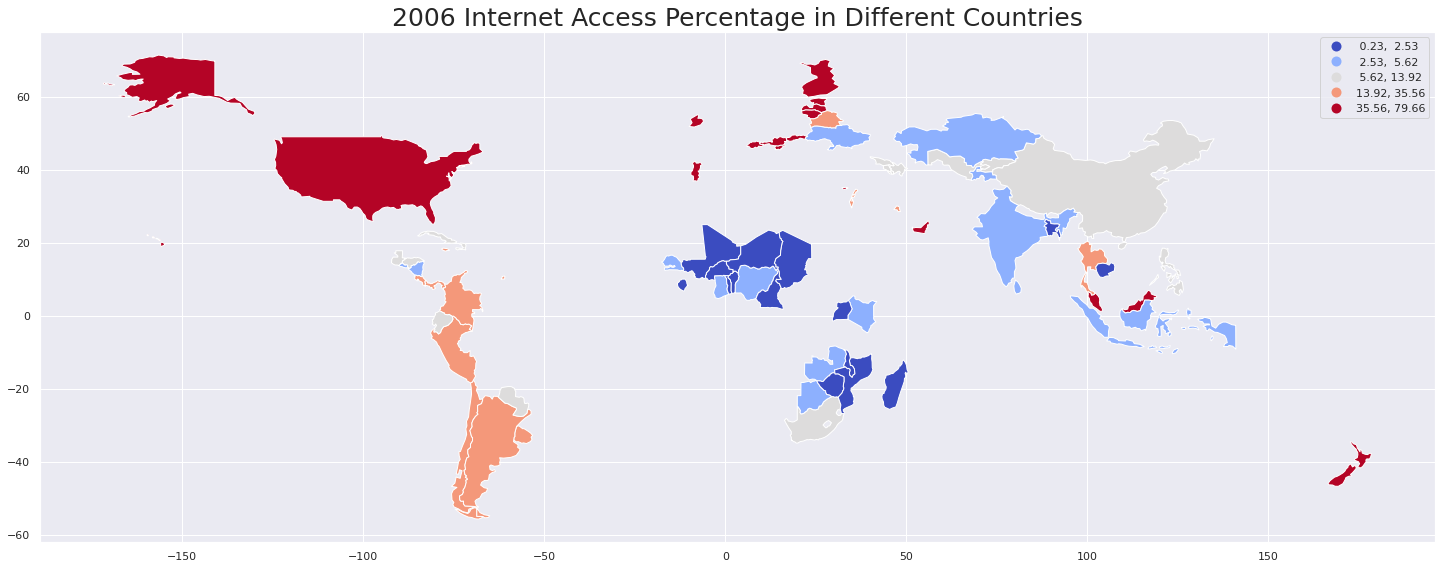

In [ ]:
#@title 2006 World Map for Internet Accessibility 
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2006.plot(column='percent', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2006 Internet Access Percentage in Different Countries',fontsize=25)
plt.show()

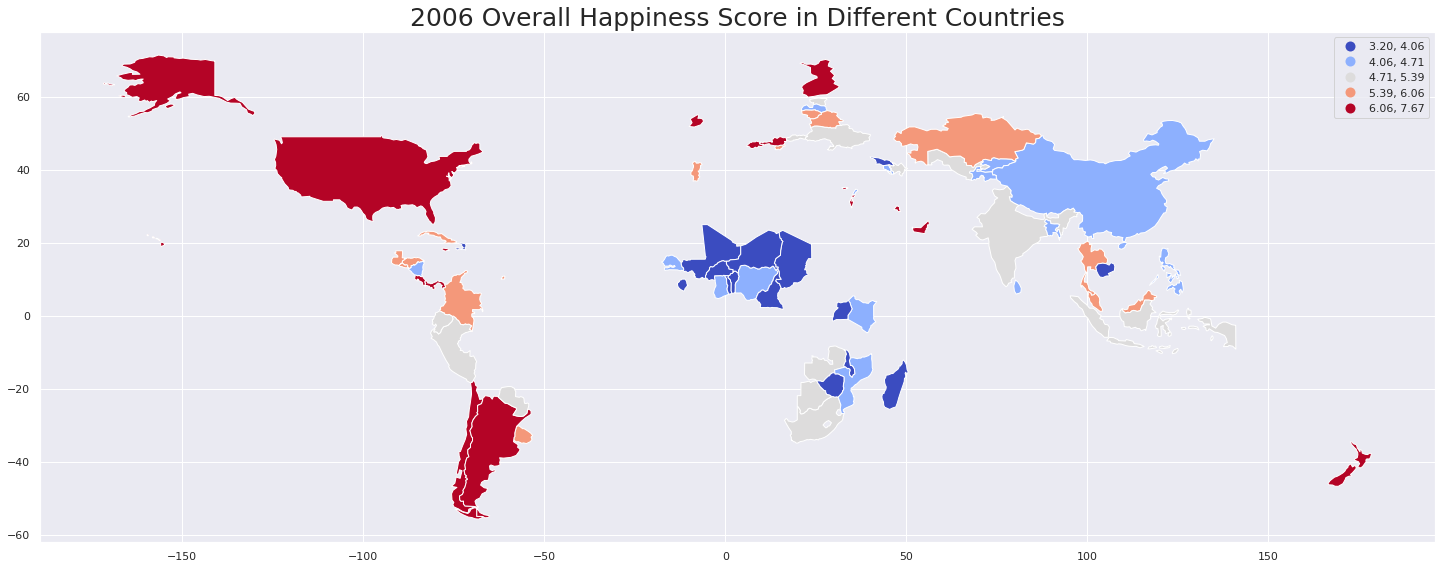

In [ ]:
#@title 2006 World Map for overall happiness
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2006.plot(column='Life.Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2006 Overall Happiness Score in Different Countries',fontsize=25)
plt.show()

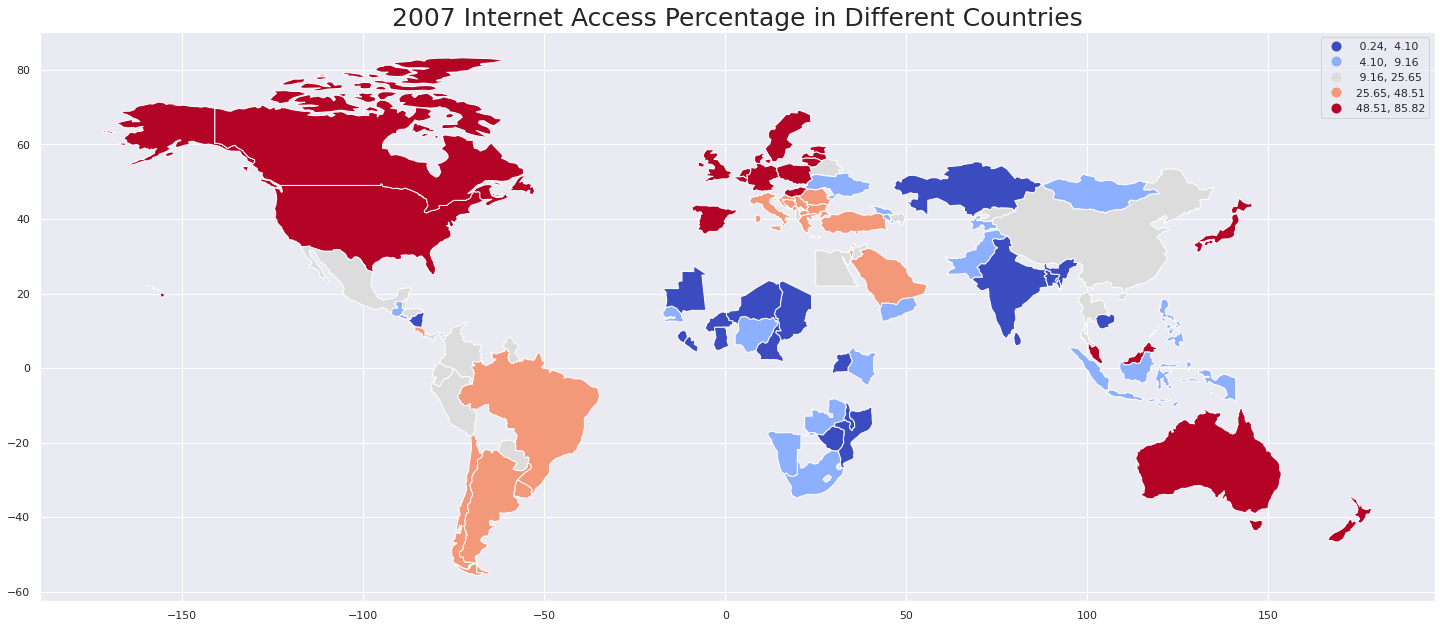

In [ ]:
#@title 2007 World Map for Internet Accessibility 
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2007.plot(column='percent', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2007 Internet Access Percentage in Different Countries',fontsize=25)
plt.show()

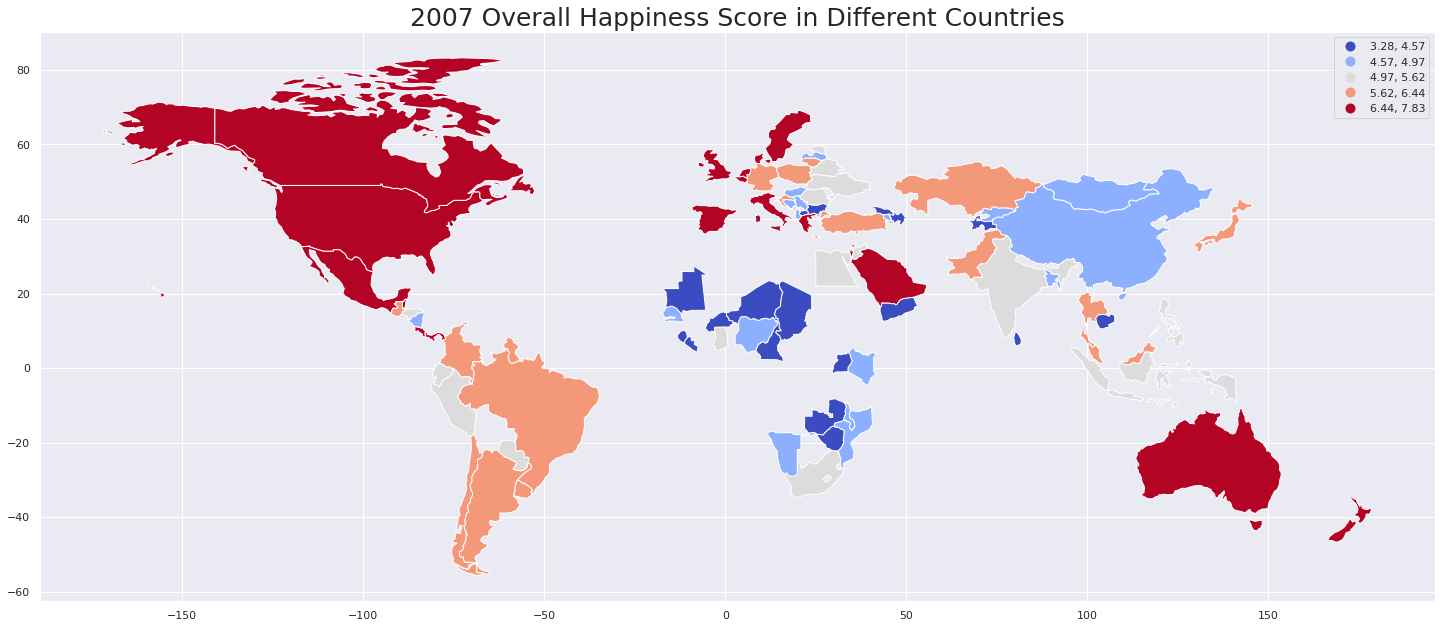

In [ ]:
#@title 2007 World Map for overall happiness
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2007.plot(column='Life.Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2007 Overall Happiness Score in Different Countries',fontsize=25)
plt.show()

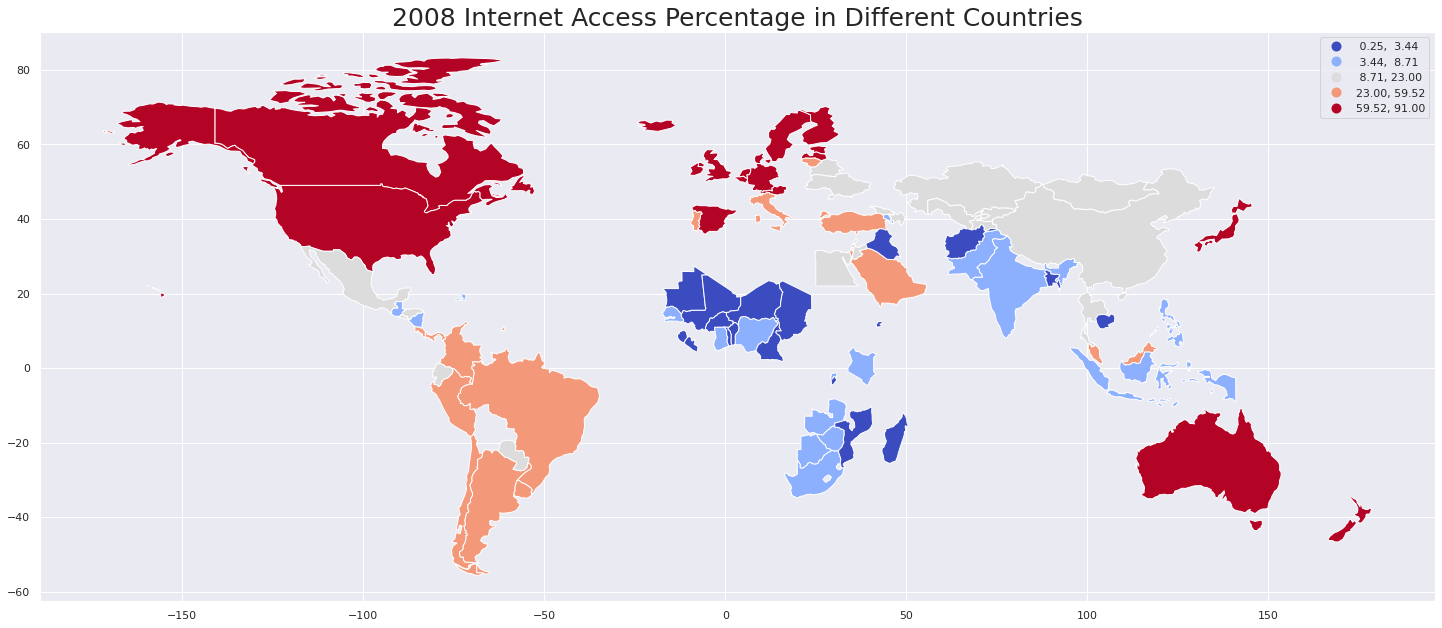

In [ ]:
#@title 2008 World Map for Internet Accessibility 
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2008.plot(column='percent', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2008 Internet Access Percentage in Different Countries',fontsize=25)
plt.show()

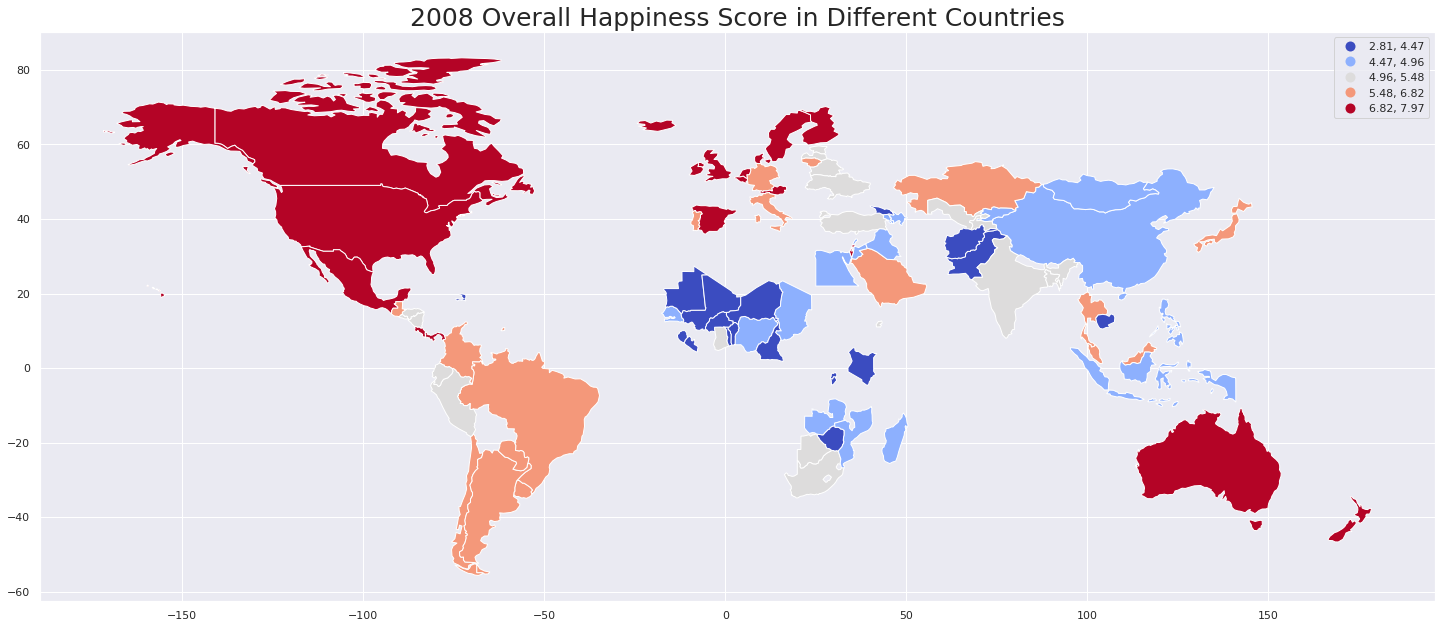

In [ ]:
#@title 2008 World Map for overall happiness
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2008.plot(column='Life.Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2008 Overall Happiness Score in Different Countries',fontsize=25)
plt.show()

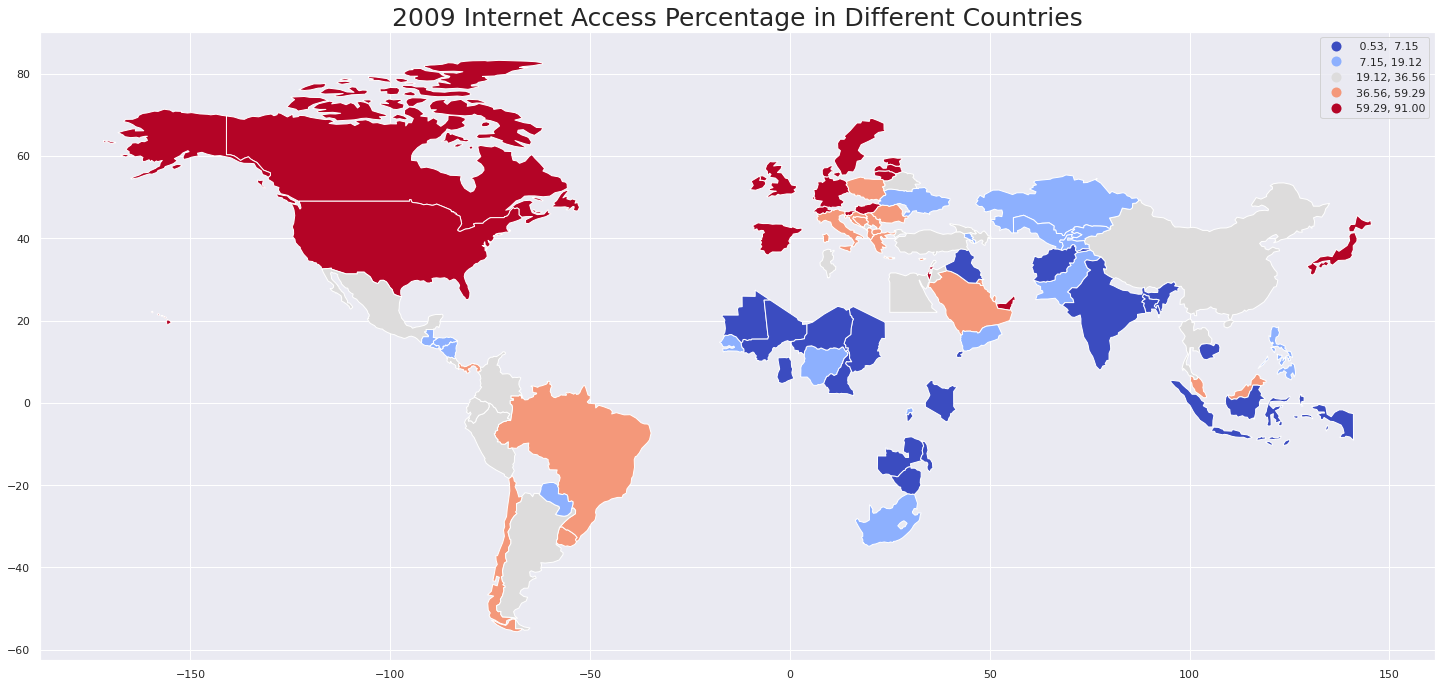

In [ ]:
#@title 2009 World Map for Internet Accessibility 
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2009.plot(column='percent', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2009 Internet Access Percentage in Different Countries',fontsize=25)
plt.show()

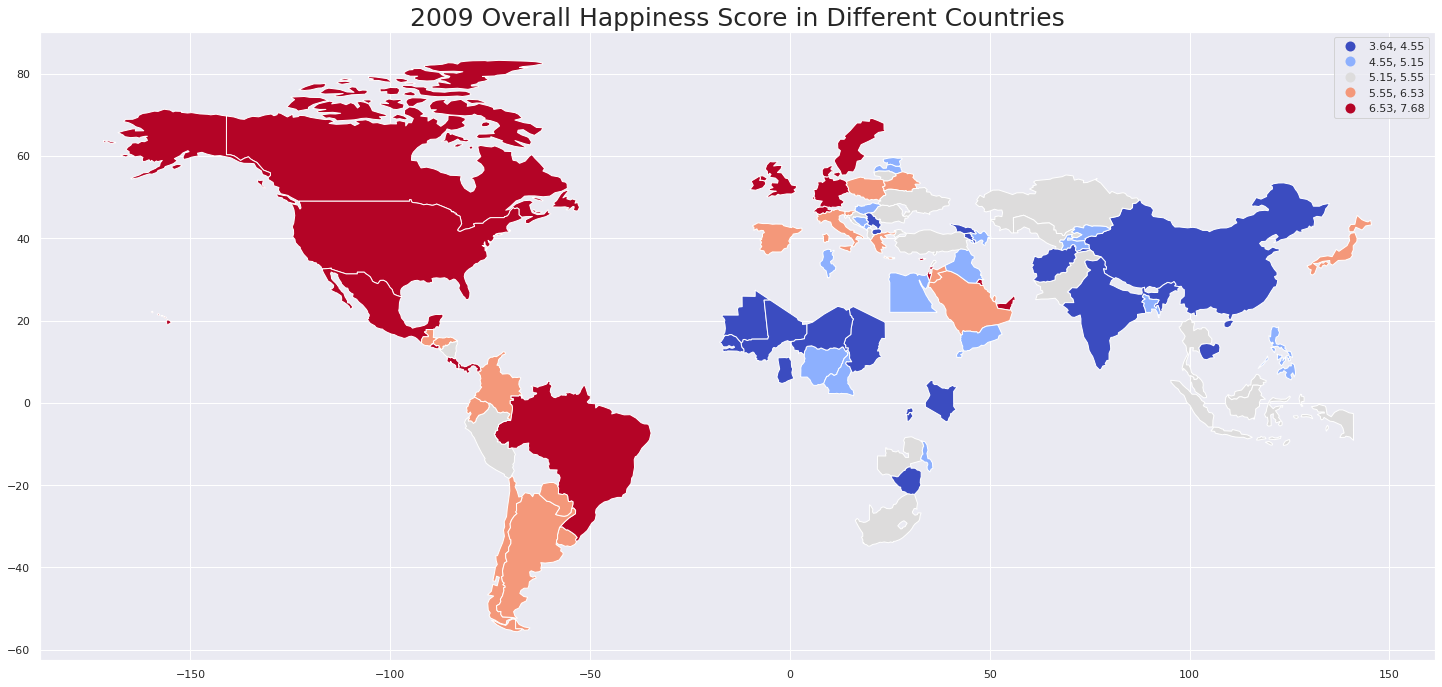

In [ ]:
#@title 2009 World Map for overall happiness
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2009.plot(column='Life.Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2009 Overall Happiness Score in Different Countries',fontsize=25)
plt.show()

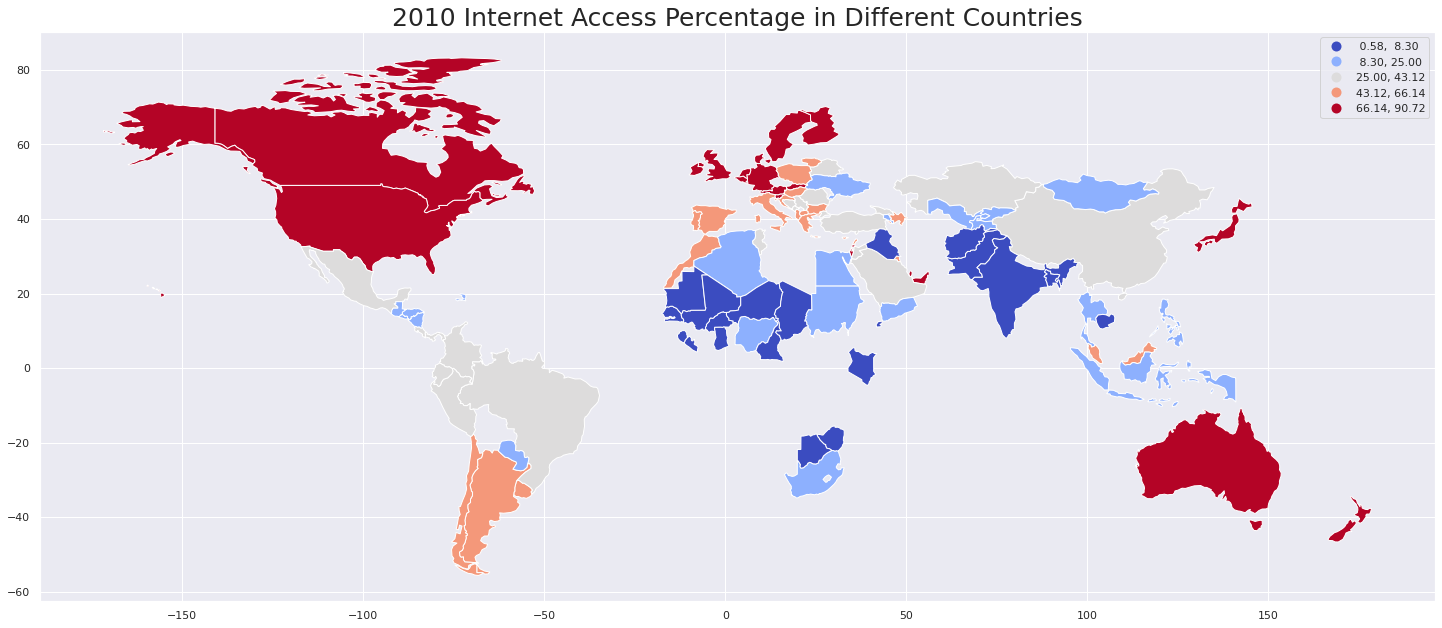

In [ ]:
#@title 2010 World Map for Internet Accessibility 
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2010.plot(column='percent', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2010 Internet Access Percentage in Different Countries',fontsize=25)
plt.show()

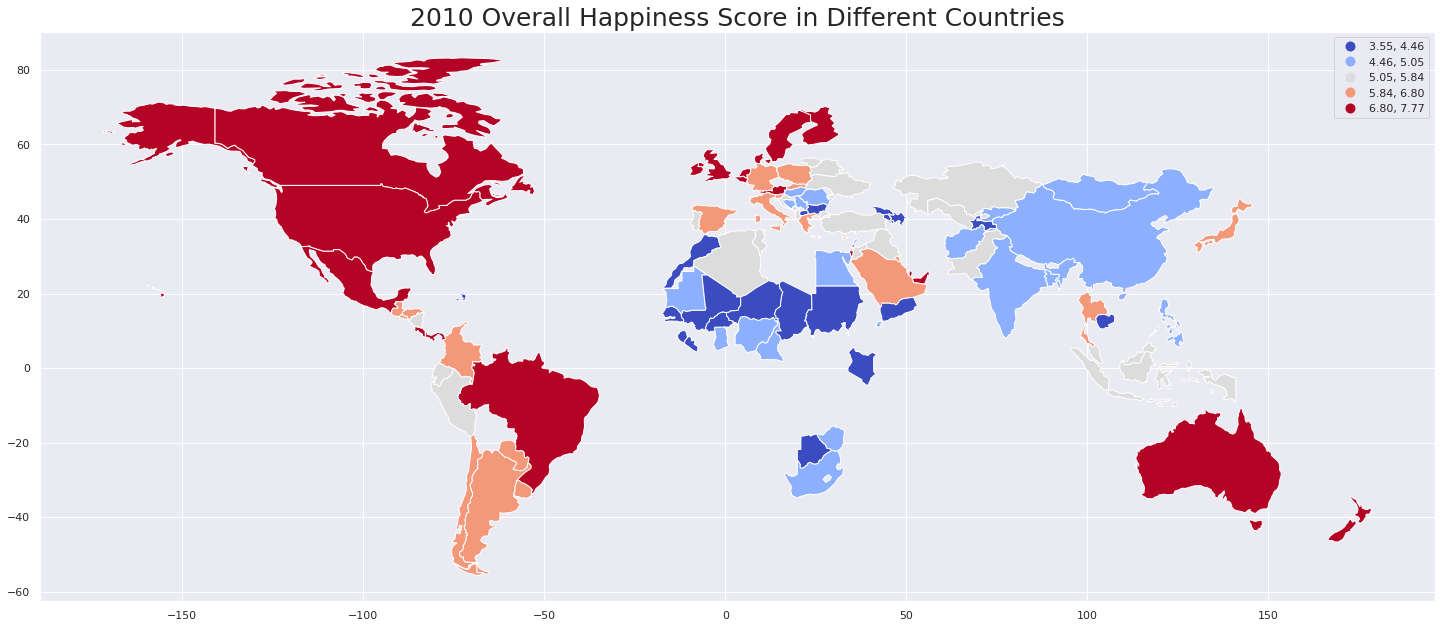

In [ ]:
#@title 2010 World Map for overall happiness
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2010.plot(column='Life.Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2010 Overall Happiness Score in Different Countries',fontsize=25)
plt.show()

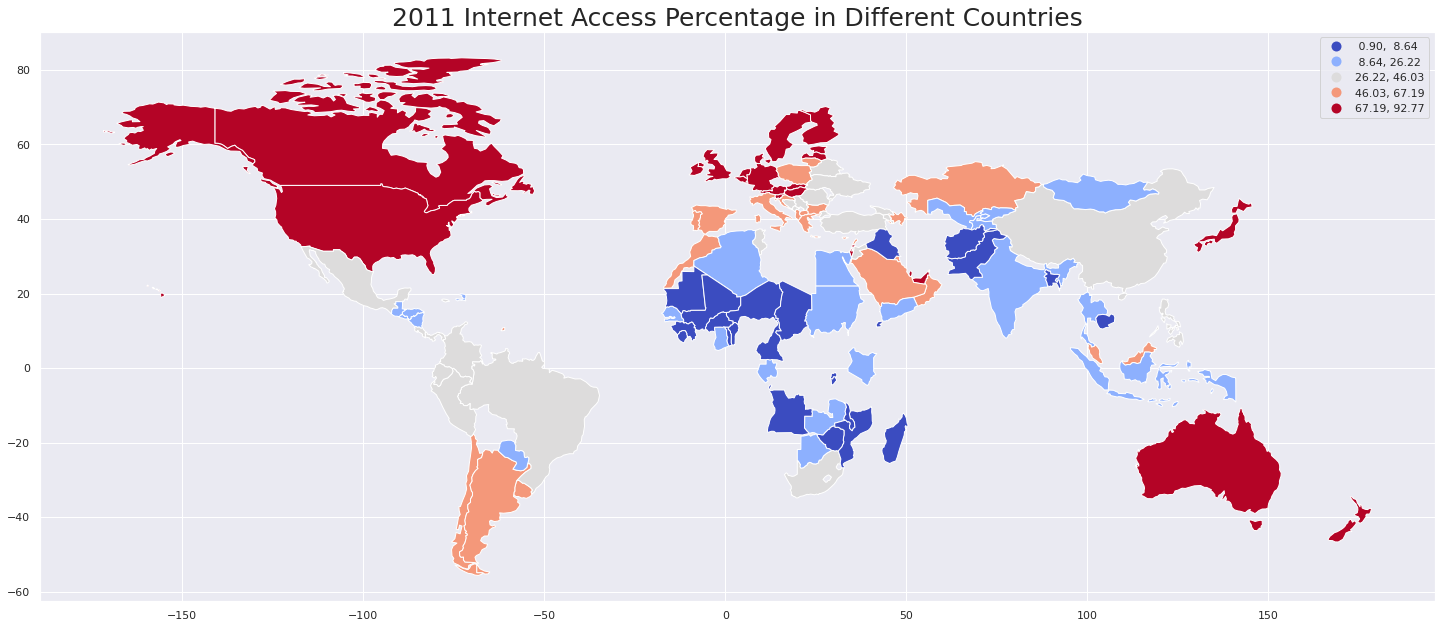

In [ ]:
#@title 2011 World Map for Internet Accessibility 
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2011.plot(column='percent', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2011 Internet Access Percentage in Different Countries',fontsize=25)
plt.show()

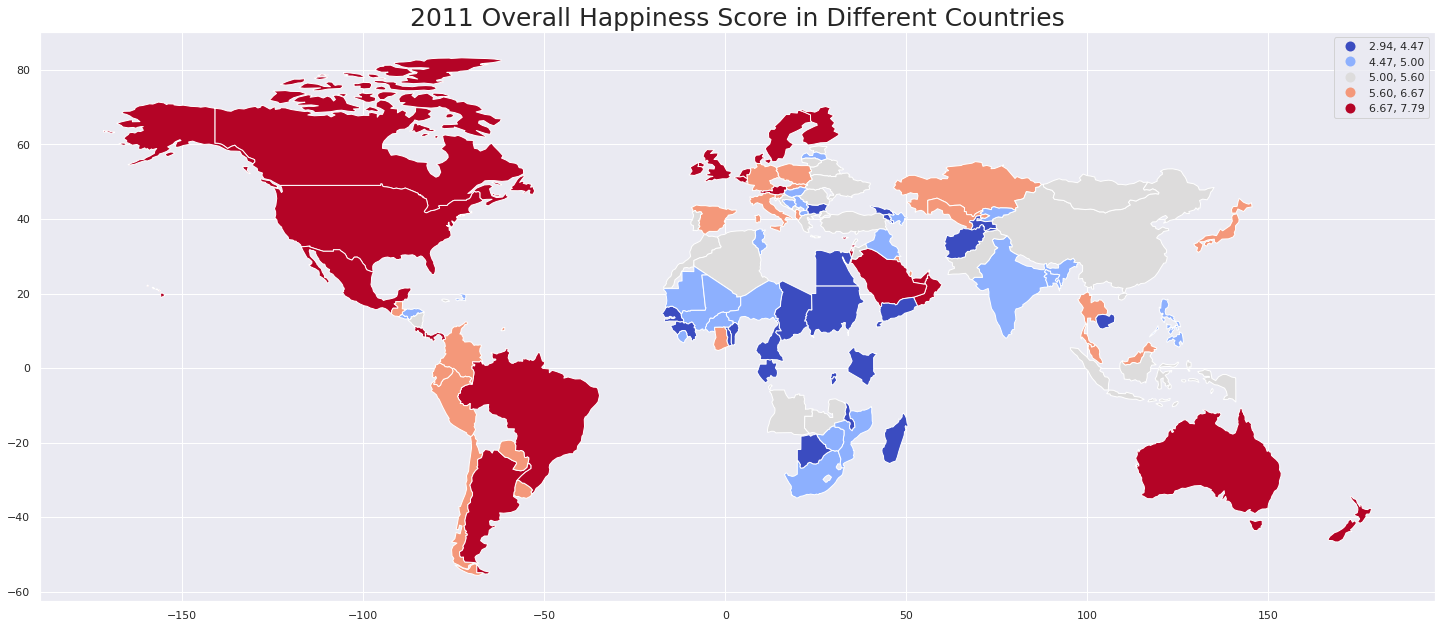

In [ ]:
#@title 2011 World Map for overall happiness
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2011.plot(column='Life.Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2011 Overall Happiness Score in Different Countries',fontsize=25)
plt.show()

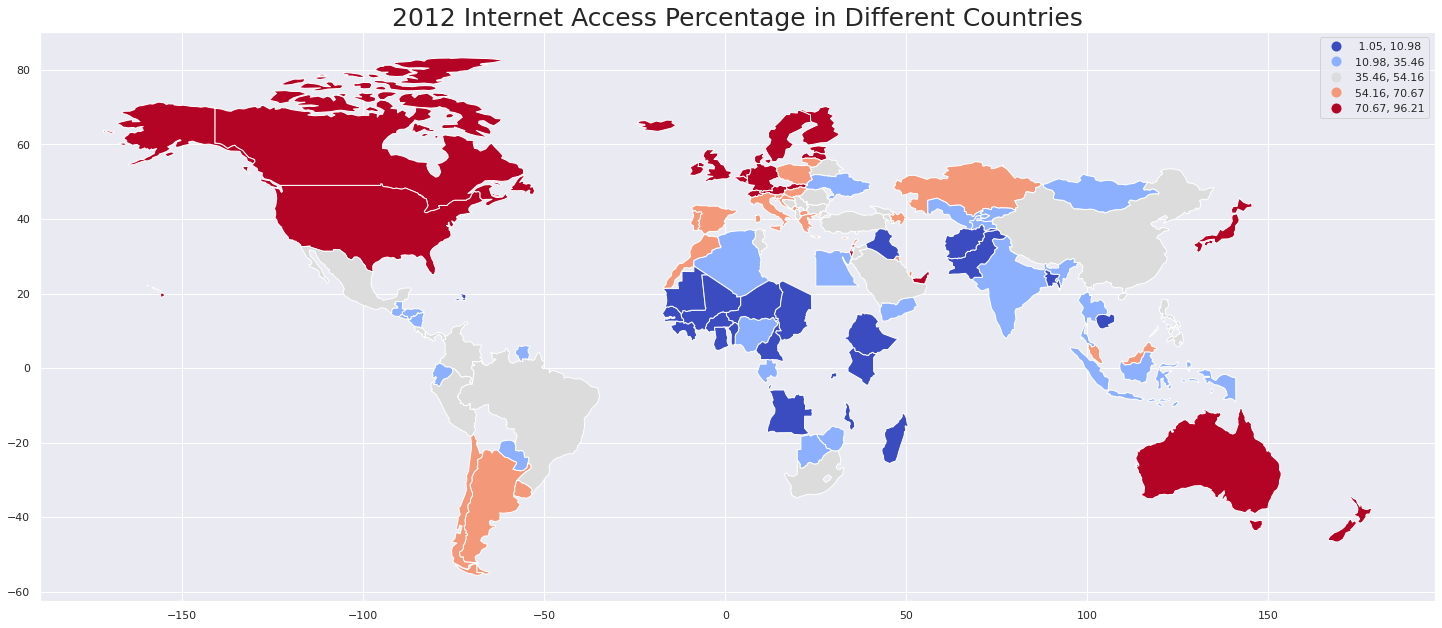

In [ ]:
#@title 2012 World Map for Internet Accessibility 
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2012.plot(column='percent', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2012 Internet Access Percentage in Different Countries',fontsize=25)
plt.show()

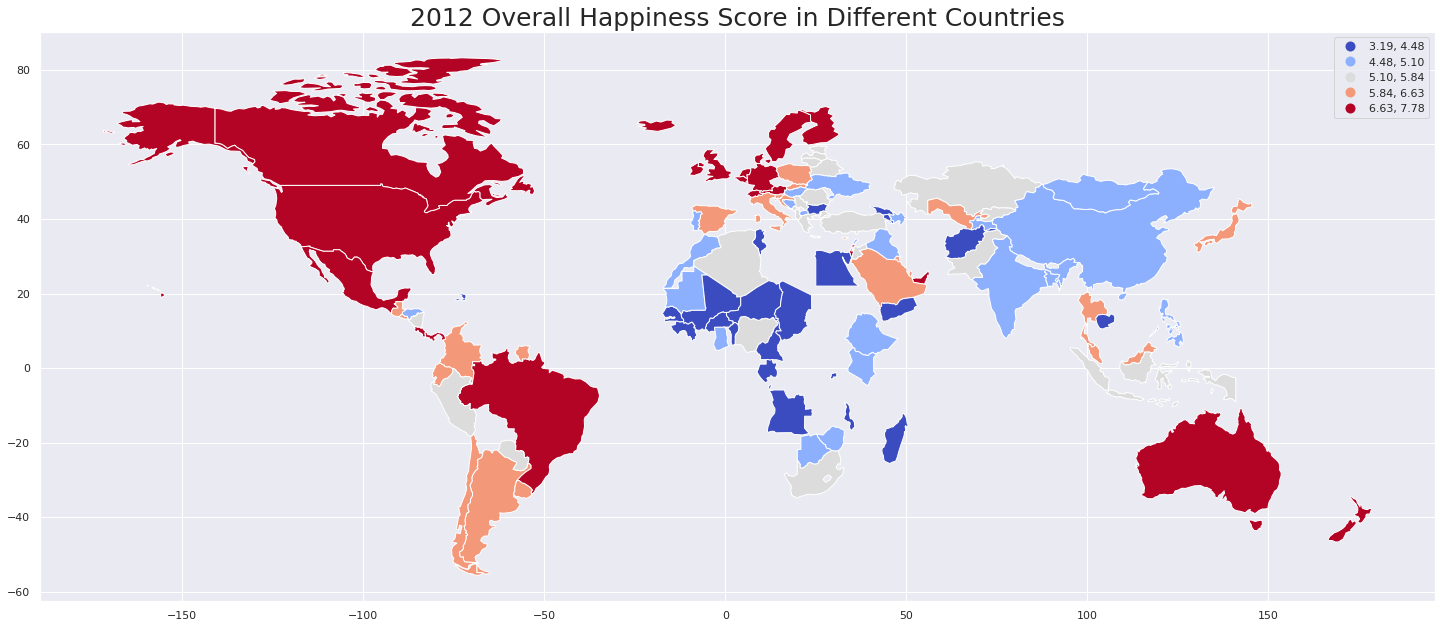

In [ ]:
#@title 2012 World Map for overall happiness
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2012.plot(column='Life.Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2012 Overall Happiness Score in Different Countries',fontsize=25)
plt.show()

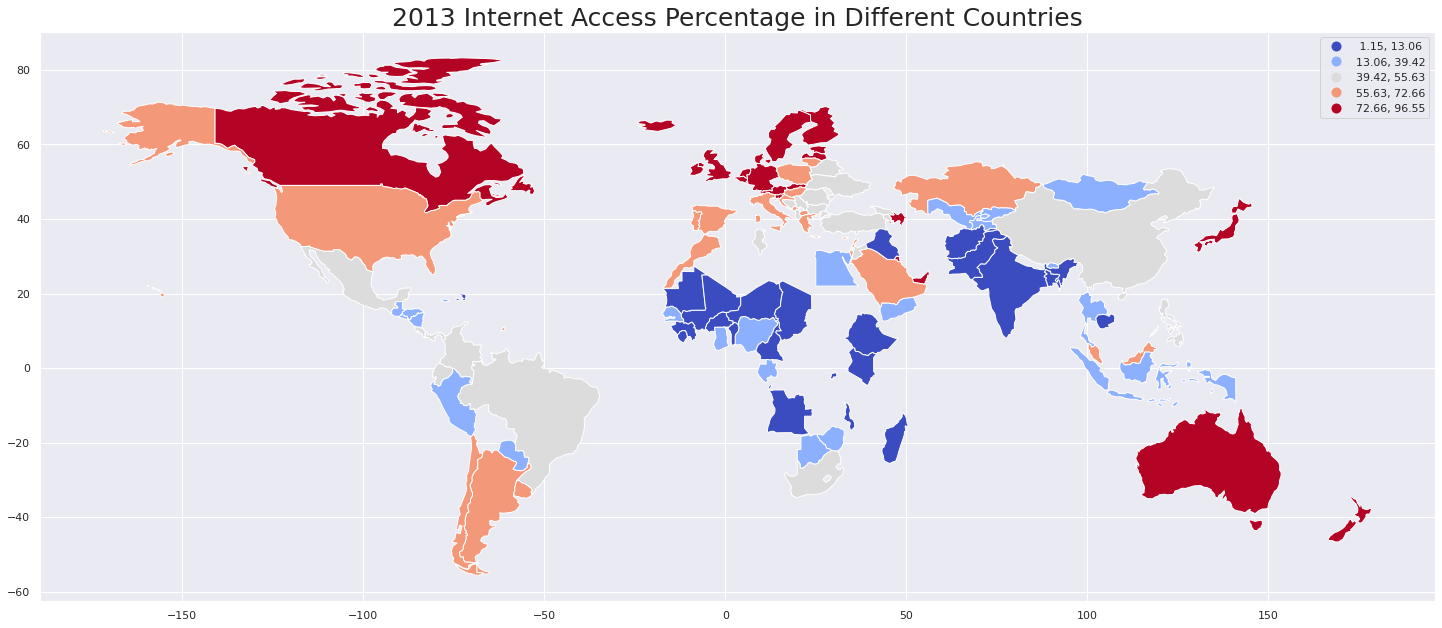

In [ ]:
#@title 2013 World Map for Internet Accessibility 
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2013.plot(column='percent', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2013 Internet Access Percentage in Different Countries',fontsize=25)
plt.show()

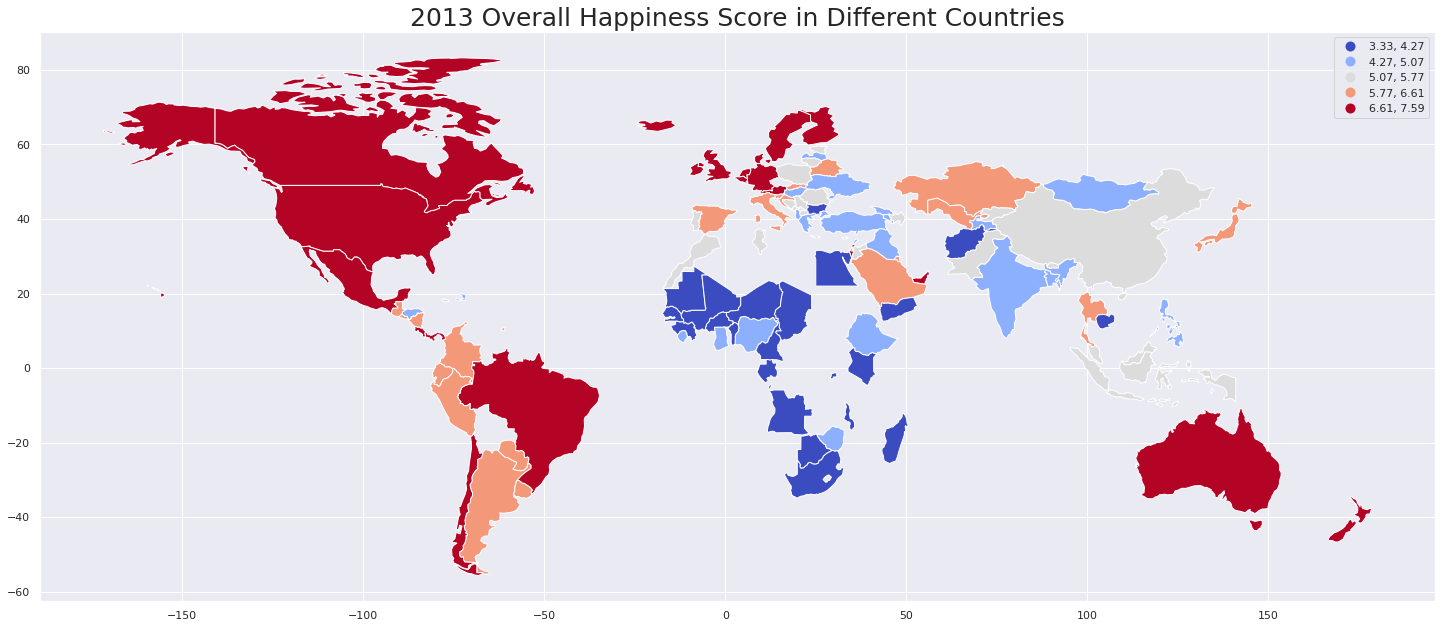

In [ ]:
#@title 2013 World Map for overall happiness
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2013.plot(column='Life.Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2013 Overall Happiness Score in Different Countries',fontsize=25)
plt.show()

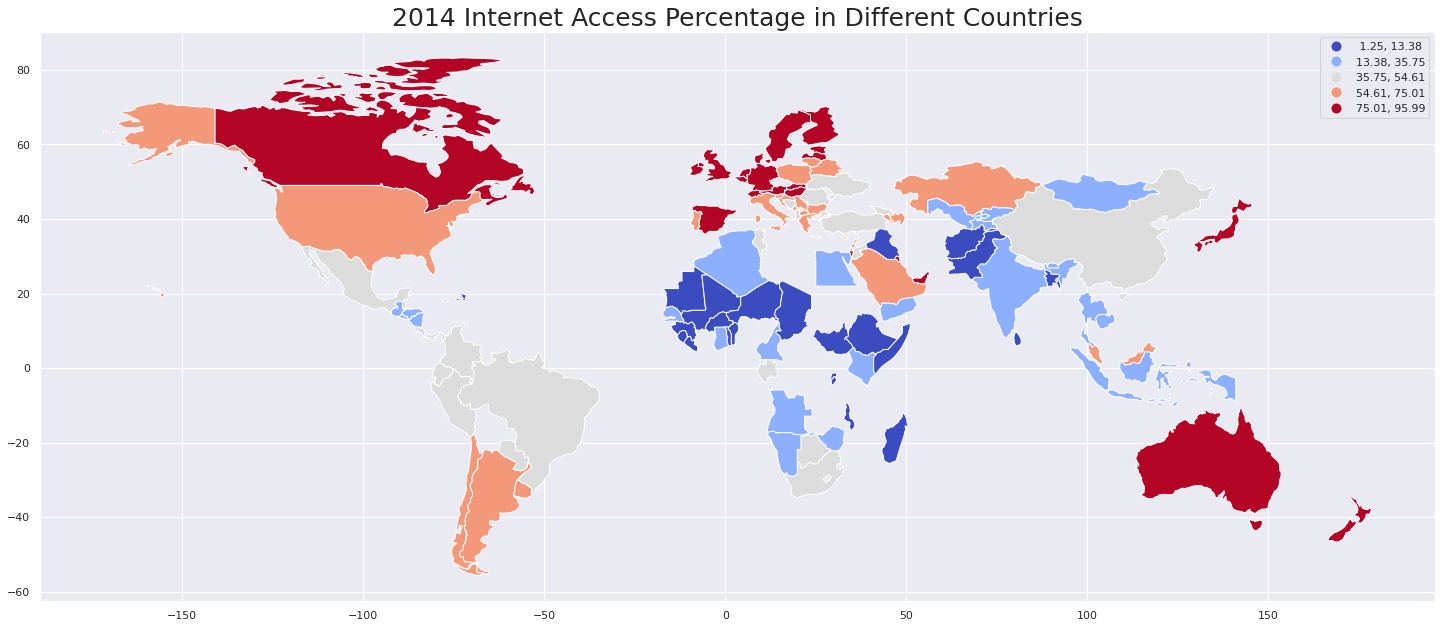

In [ ]:
#@title 2014 World Map for Internet Accessibility 
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2014.plot(column='percent', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2014 Internet Access Percentage in Different Countries',fontsize=25)
plt.show()

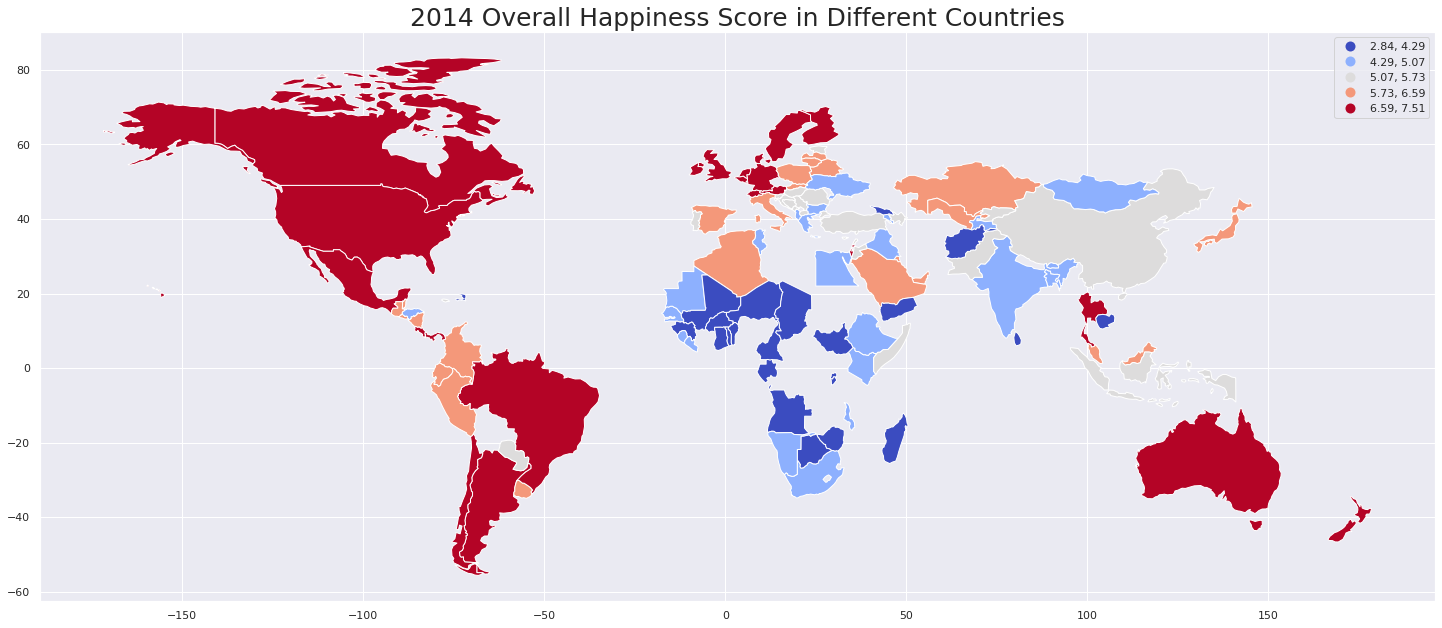

In [ ]:
#@title 2014 World Map for overall happiness
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2014.plot(column='Life.Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2014 Overall Happiness Score in Different Countries',fontsize=25)
plt.show()

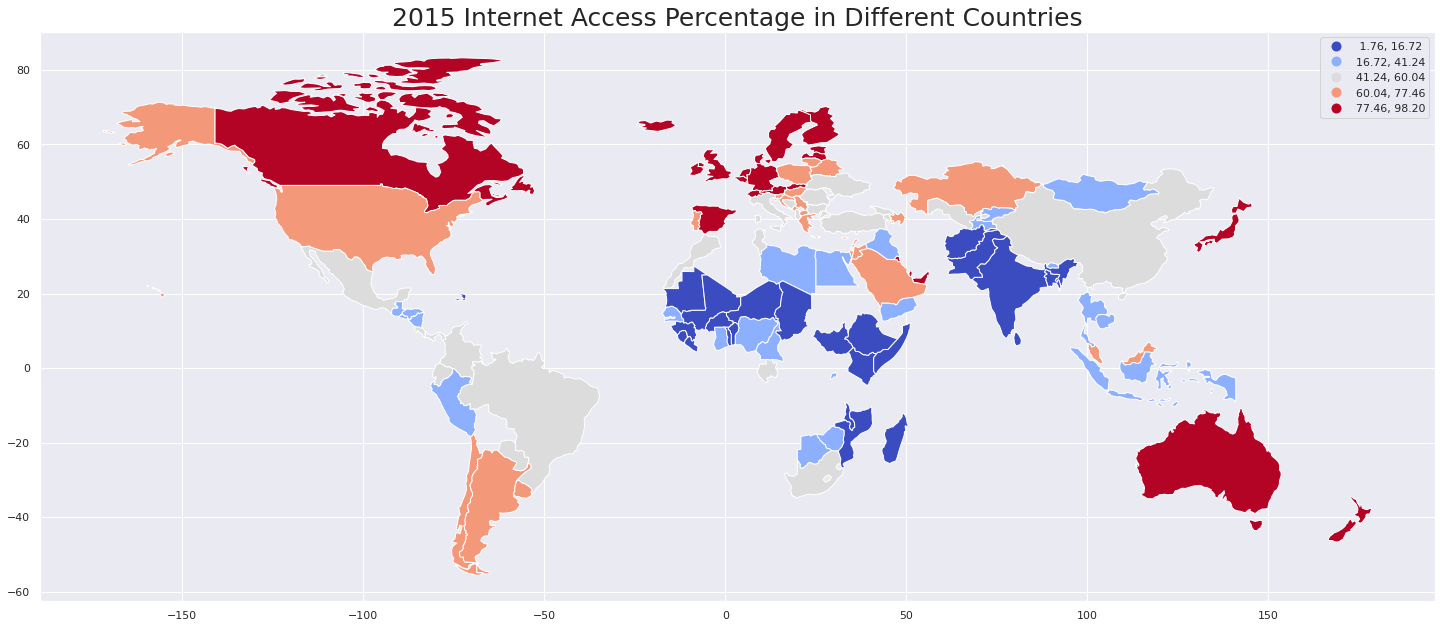

In [ ]:
#@title 2015 World Map for Internet Accessibility 
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2015.plot(column='percent', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2015 Internet Access Percentage in Different Countries',fontsize=25)
plt.show()

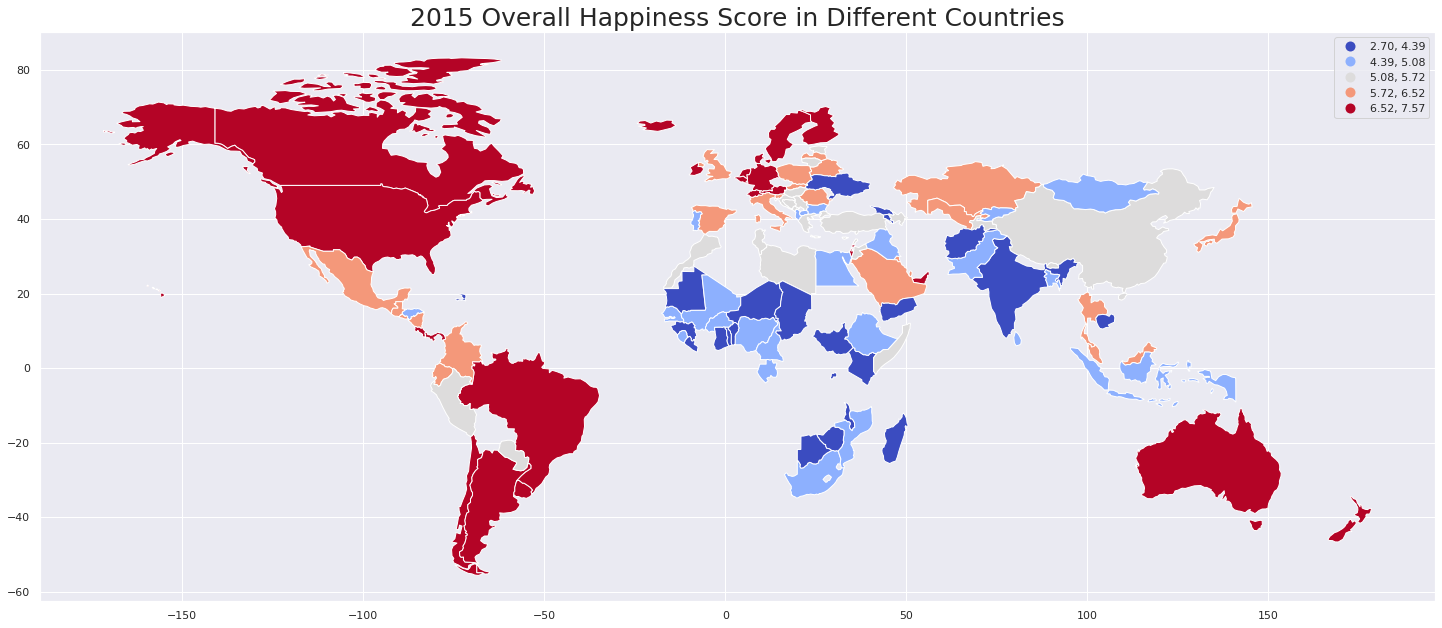

In [ ]:
#@title 2015 World Map for overall happiness
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2015.plot(column='Life.Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2015 Overall Happiness Score in Different Countries',fontsize=25)
plt.show()

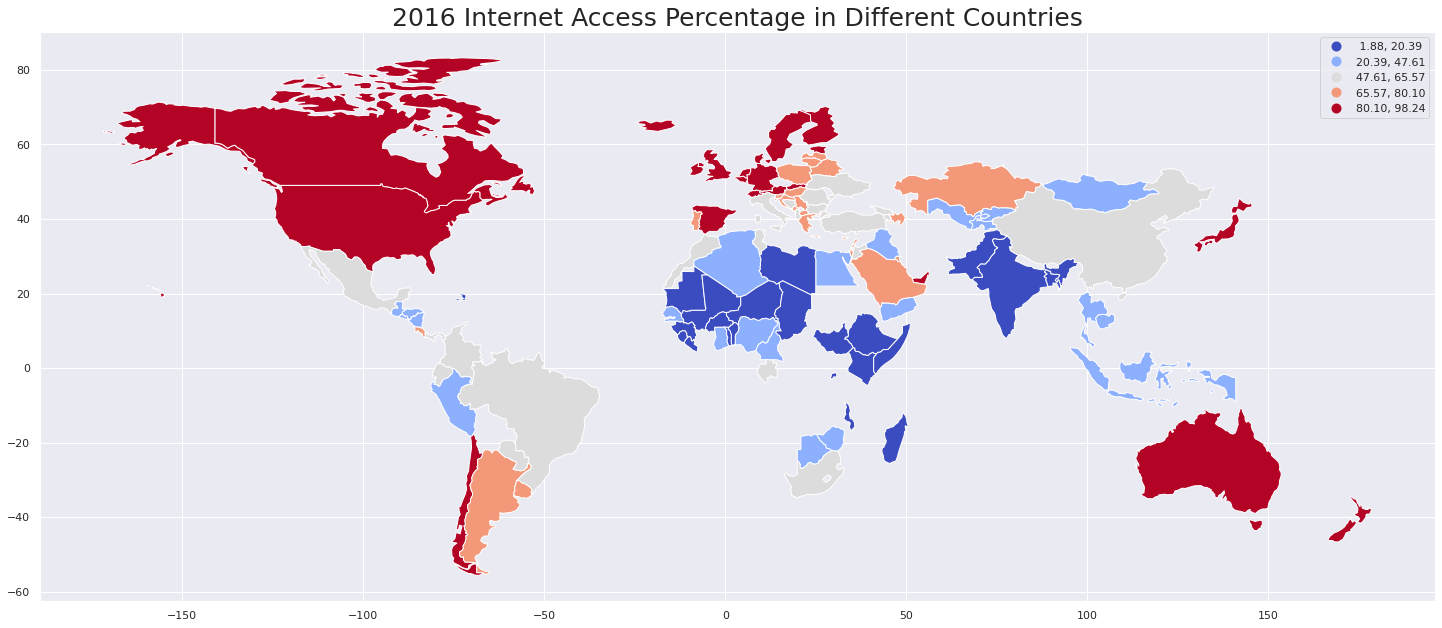

In [ ]:
#@title 2016 World Map for Internet Accessibility 
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2016.plot(column='percent', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2016 Internet Access Percentage in Different Countries',fontsize=25)
plt.show()

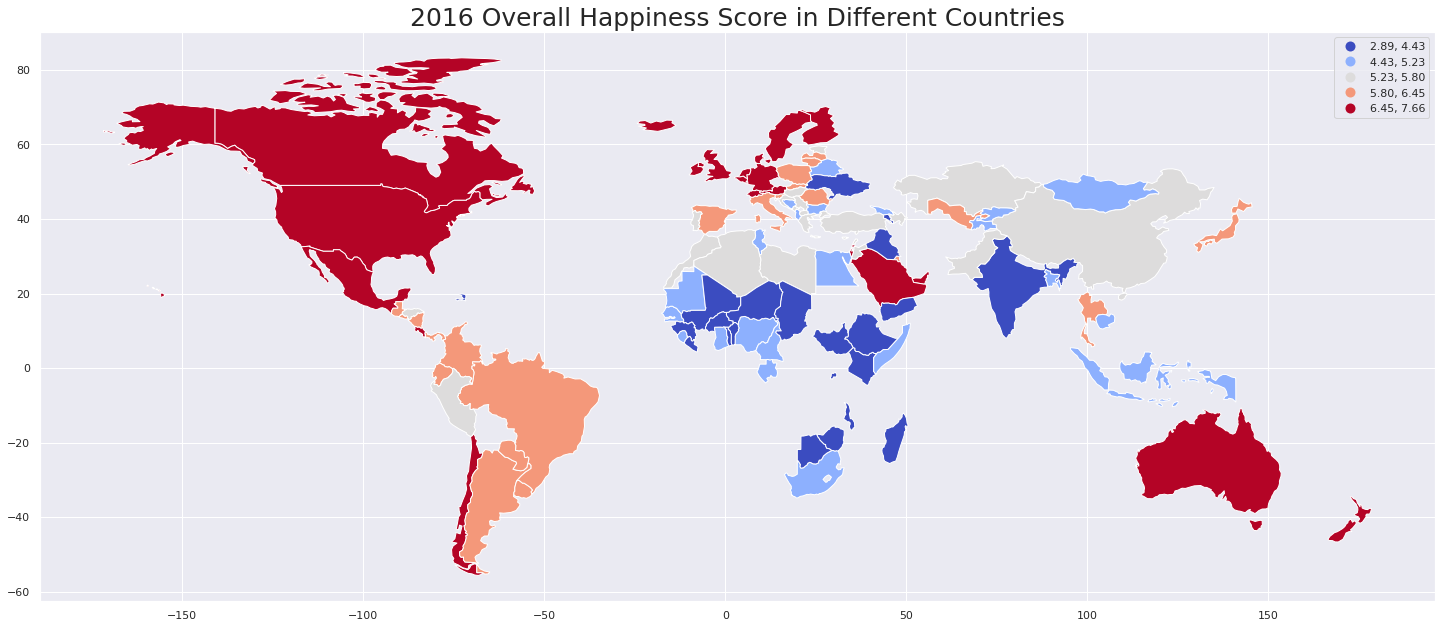

In [ ]:
#@title 2016 World Map for overall happiness
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2016.plot(column='Life.Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2016 Overall Happiness Score in Different Countries',fontsize=25)
plt.show()

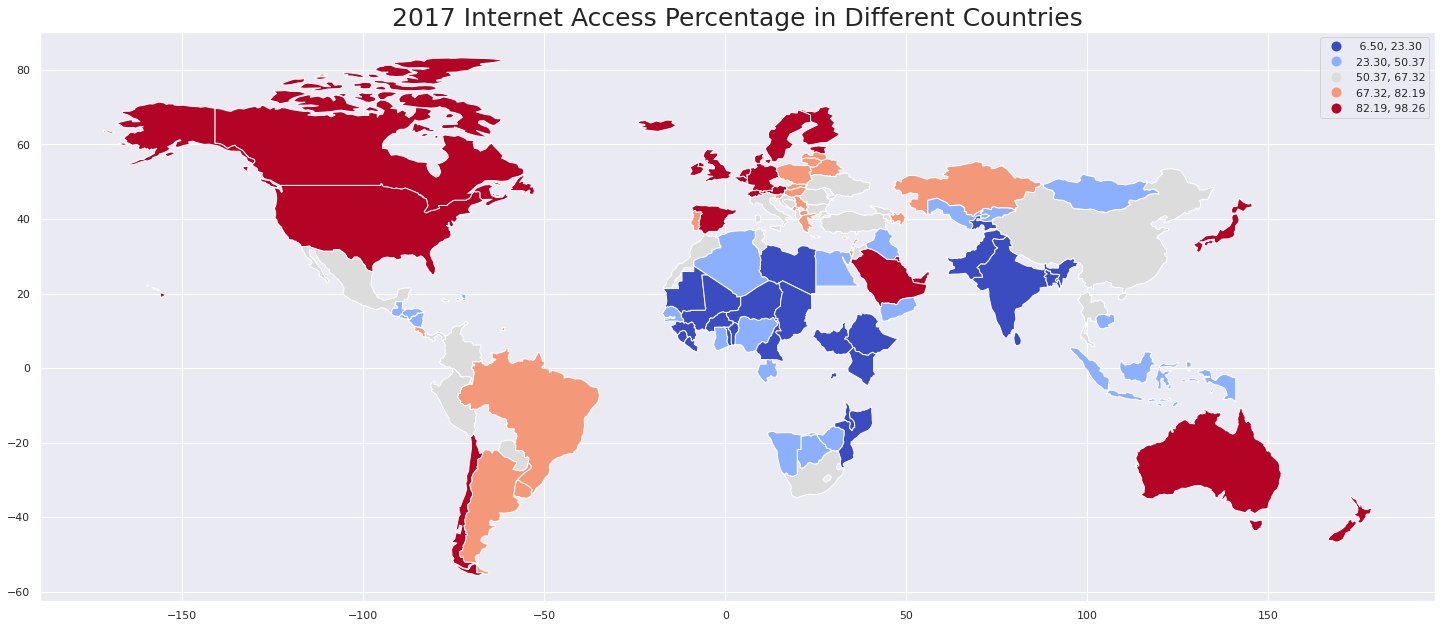

In [ ]:
#@title 2017 World Map for Internet Accessibility 
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2017.plot(column='percent', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2017 Internet Access Percentage in Different Countries',fontsize=25)
plt.show()

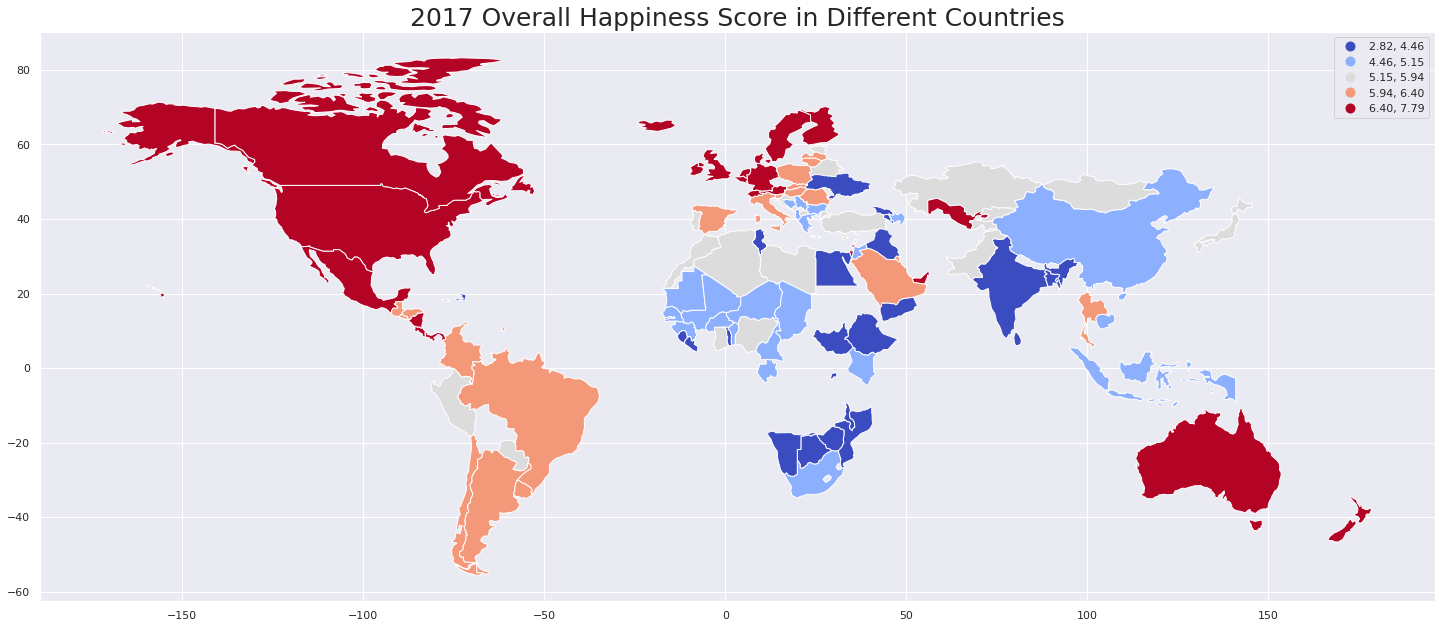

In [ ]:
#@title 2017 World Map for overall happiness
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
 .plot(column='Life.Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2017 Overall Happiness Score in Different Countries',fontsize=25)
plt.show()

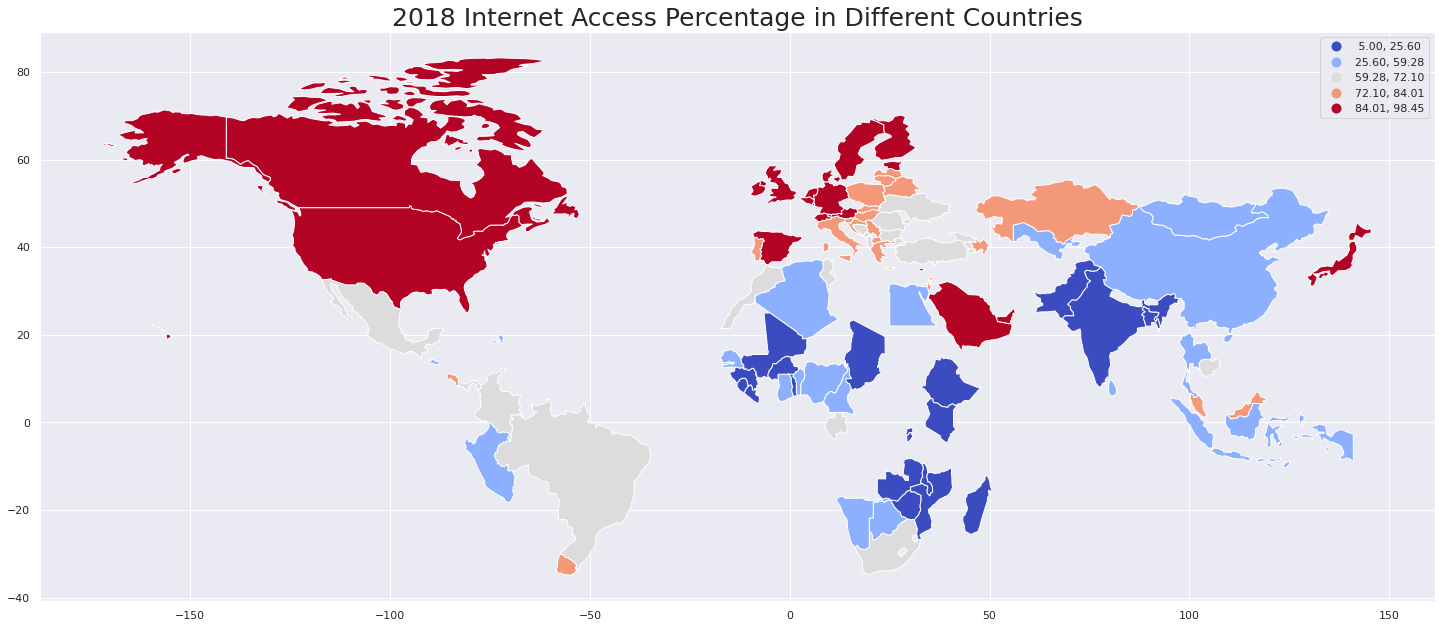

In [ ]:
#@title 2018 World Map for Internet Accessibility 
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2018.plot(column='percent', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2018 Internet Access Percentage in Different Countries',fontsize=25)
# add countries names and numbers 
for i in range(0):
    plt.text(float(Table_2018.longitude[i]),float(Table_2018.latitude[i]),"{}\n{}".format(Table_2018.name[i],Table_2018.percent[i]),size=5)
plt.show()

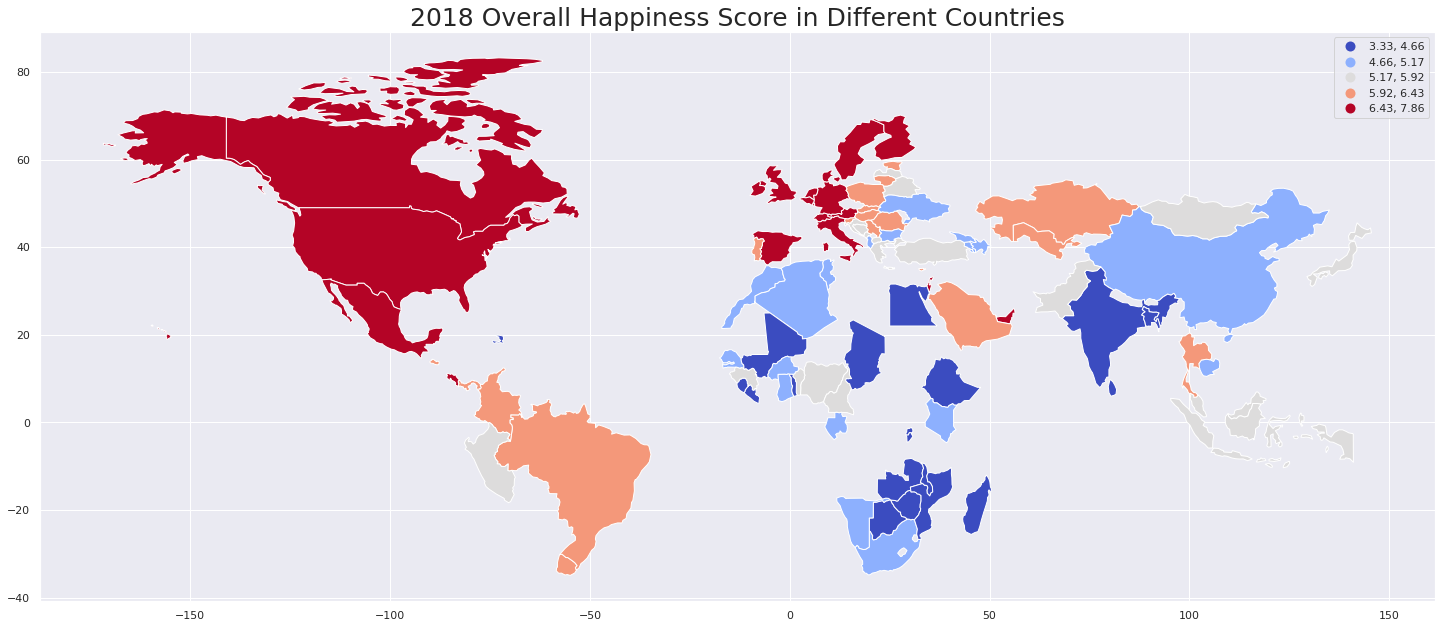

In [ ]:
#@title 2018 World Map for overall happiness
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2018.plot(column='Life.Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2018 Overall Happiness Score in Different Countries',fontsize=25)
# add countries names and numbers 
for i in range(0):
    plt.text(float(Table_2018.longitude[i]),float(Table_2018.latitude[i]),"{}\n{}".format(Table_2018.name[i],Table_2018['Life.Ladder'][i]),size=10)
plt.show()

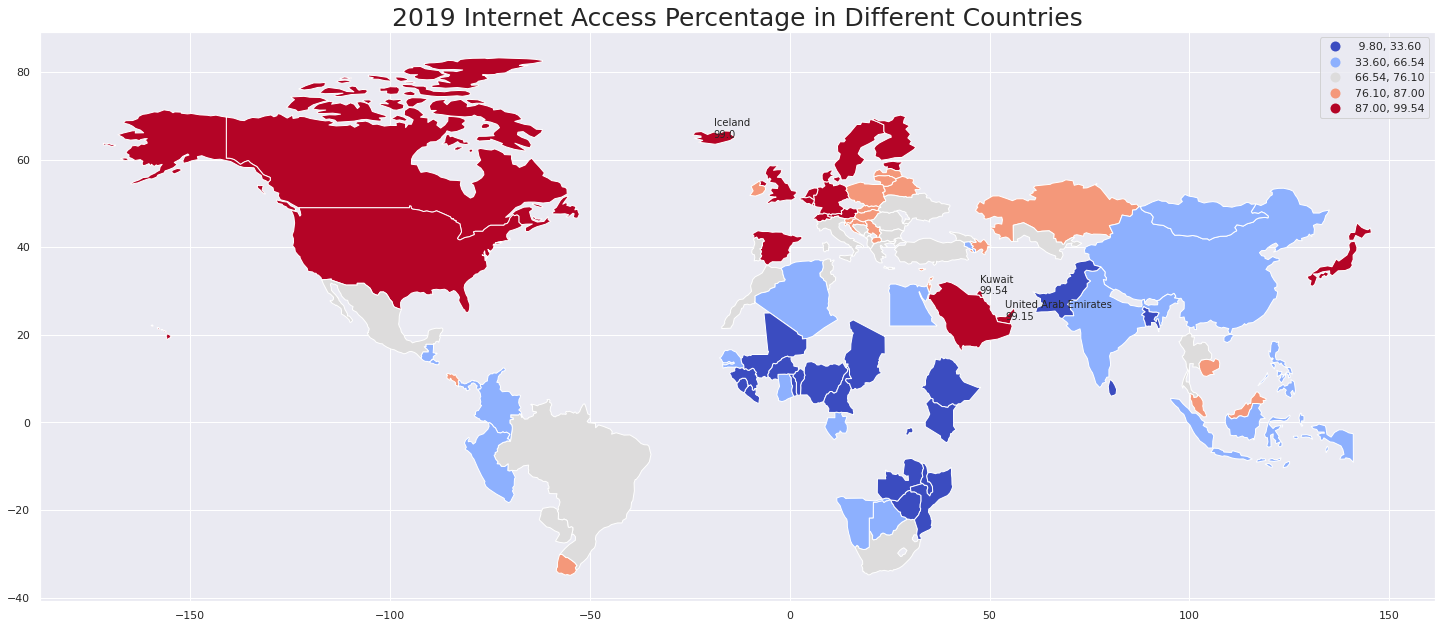

In [ ]:
#@title 2019 World Map for Internet Accesssibility
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2019.plot(column='percent', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2019 Internet Access Percentage in Different Countries',fontsize=25)
# add countries names and numbers 
for i in range(0,3):
    plt.text(float(Table_2019.longitude[i]),float(Table_2019.latitude[i]),"{}\n{}".format(Table_2019.name[i],Table_2019.percent[i]),size=10)
plt.show()

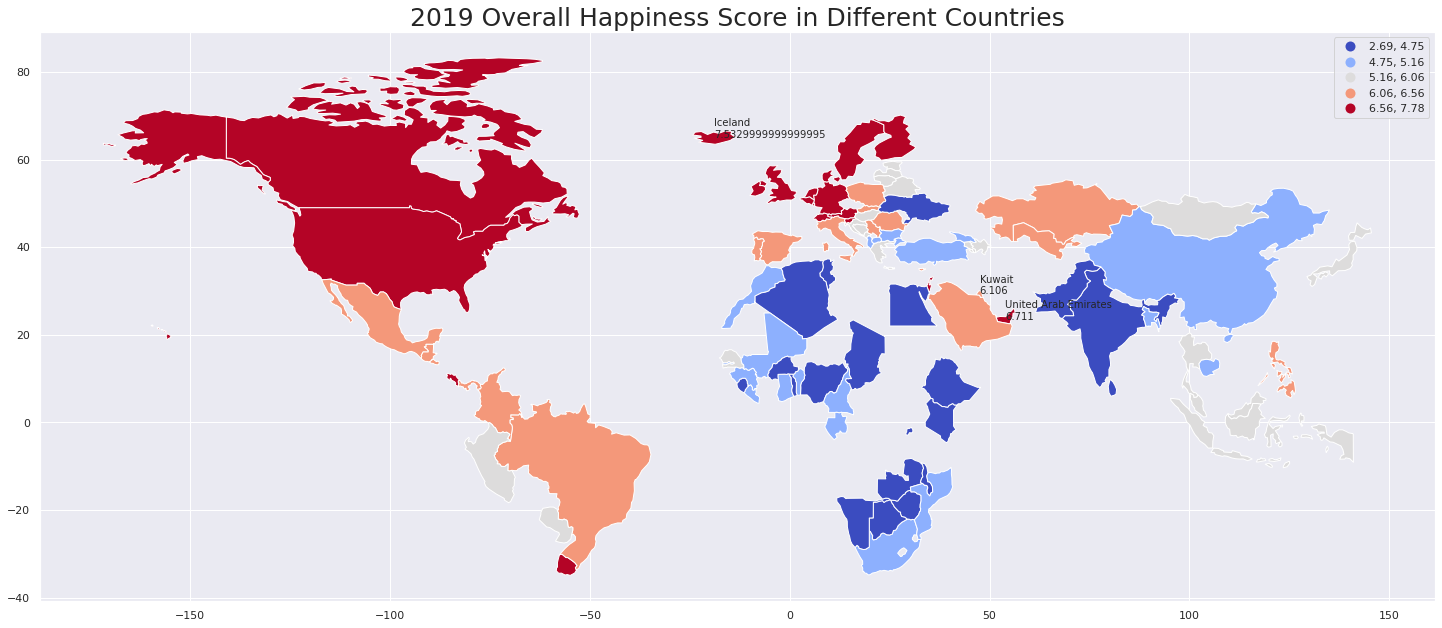

In [ ]:
#@title 2019 World Map for overall happiness 
import mapclassify
import matplotlib.pyplot as plt
 
# plot confirmed cases world map 
Table_2019.plot(column='Life.Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2019 Overall Happiness Score in Different Countries',fontsize=25)
# add countries names and numbers 
for i in range(0,3):
    plt.text(float(Table_2019.longitude[i]),float(Table_2019.latitude[i]),"{}\n{}".format(Table_2019.name[i],Table_2019['Life.Ladder'][i]),size=10)
plt.show()

Overall, these graphs support our above hypothesis. Many countries with high percentage of internet access also have high overall happiness scores. For example, Australia has high internet access and high happiness from 2010 onward. Meanwhile, other countries show consistently low internet access and low happiness such as India. Despite these results, these graphs lack a clear explanation of change over time which we will do more clearly in the following graphs.

### Comparison within country over time (internet accessibility vs. Life Ladder)

The world map provides us with a general insight on how the overall internet accessibility and the overall happiness is changing around the world over time. Now we aim to create an interactive graph, that side-by-side compare a single country's change in internet accessibility vs overall happiness overtime. 

In [ ]:
from bokeh.models import ColumnDataSource, CustomJS, Select
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.layouts import column, row

Since the dataframe we used for world map is extracted from dataframe "merge" and the dataframe is sorted from high to low based on the attribute "percent". For this section, we need to re-sort the dataframe based on year, the new dataframe is saved into the variable "merget".

In [ ]:
# change the sequence of the dataframe sorting on year
merget=merge.sort_values(by='year',ascending=True).reset_index()

In [ ]:
#@title Ignore this code cell if the interactive graph is working below, run this code cell if the following interactive graph is not plotting anything out
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

p = figure(plot_width=400, plot_height=400)

p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=15, line_color="navy", 
fill_color="orange", fill_alpha=0.5)

show(p)

In [ ]:
#@title Comparation between internet accessibility vs. Overall Happiness Index { display-mode: "form" }

country_list = list(merget['Country'].unique())
cols1=merget.loc[:, ['Country','year', 'percent']]
cols2 = cols1[cols1['Country'] == 'Netherlands' ]
Overall = ColumnDataSource(data=cols1)
Curr=ColumnDataSource(data=cols2)
#plot and the menu is linked with each other by this callback function
callback = CustomJS(args=dict(source=Overall, sc=Curr), code="""
var f = cb_obj.value
sc.data['year']=[]
sc.data['percent']=[]
for(var i = 0; i <= source.get_length(); i++){
	if (source.data['Country'][i] == f){
		sc.data['year'].push(source.data['year'][i])
		sc.data['percent'].push(source.data['percent'][i])
	 }
}   
   
sc.change.emit();
""")

menu = Select(options=country_list,value='Netherlands', title = 'Country')  # drop down menu
bokeh_p=figure(x_axis_label ='year', y_axis_label = 'percent', y_axis_type="linear",x_axis_type="linear") #creating figure object
bokeh_p.line(x='year', y='percent', color='green', source=Curr) 

# plotting the data using glyph circle
menu.js_on_change('value', callback) # calling the function on change of selection

layoutp=column(menu, bokeh_p) # creating the layout



###################################################

country_list = list(merget['Country'].unique())
cols3=merget.loc[:, ['Country','year', 'Life.Ladder']]
cols4 = cols3[cols3['Country'] == 'Netherlands' ]
Overallh = ColumnDataSource(data=cols3)
Currh=ColumnDataSource(data=cols4)
#plot and the menu is linked with each other by this callback function
callbackh = CustomJS(args=dict(source=Overallh, sc=Currh), code="""
var f = cb_obj.value
sc.data['year']=[]
sc.data['Life.Ladder']=[]
for(var i = 0; i <= source.get_length(); i++){
	if (source.data['Country'][i] == f){
		sc.data['year'].push(source.data['year'][i])
		sc.data['Life.Ladder'].push(source.data['Life.Ladder'][i])
	 }
}   
   
sc.change.emit();
""")

bokeh_h=figure(x_axis_label ='year', y_axis_label = 'Life Ladder', y_axis_type="linear",x_axis_type="linear") #creating figure object
bokeh_h.line(x='year', y='Life.Ladder', color='red', source=Currh) 

# plotting the data using glyph circle
menu.js_on_change('value', callbackh) # calling the function on change of selection

layouth=column(menu, bokeh_h) # creating the layout



show(row(layoutp, layouth))


The overall trend for most countries's internet accessibility was increasing over time. Countries like Netherlands, Canada, UK, New Zealand, etc. have high internet accessibility throughout the entire time period. These countries also have consistantly high happiness scores. Meanwhile, countries like Saudi Arabia, Kazakhstan have rapidly increasing internet access from the low percentile to the high percentile. Furthermore, the happiness index, is way more volatile than internet index. 

It seems that for countries whose internet accessibility climbs up to  near 90 percent, the happiness index has a upward trend. This is especially true for internet accessibility that goes up from an extreme low value, there's a upward trend in happiness index.(For example, Cameroon) 

However, for internet accessibility that's high the whole time, the happiness index tends to be volatile. For example, around 65% of Americans had access to the internet in 2006 and by 2018 that number is over 90%. Yet, the happiness score for the United States trendsdownwards for that same time period.

## Machine Learning Model (Confusion Matrix)

In the following section, our group decide to do a SoftMax Regression model on internet access to further confirm all the relation we state above. To do so, we need to first create another column since the internet percent attribute is continuous instead of a categorical data. We will classify the column percent into three groups based on percentile. In the column, number that>71 will be considered as high internet connectivity, between 15 and 71 is neutral internet , and number<15 will be considered as low connectivity.  We make this division based on 25 percentile and 75 percentile of the data. Also we can see from the distribution plot at the data preparation section that the density is way higher under value 15 and the density is relativly low between 15 and 71.

In [ ]:
list_of_percent = a['percent'].to_list()
print(list_of_percent)

[1.84, 3.55, 4.0, 5.0, 5.45, 5.9, 7.0, 8.26, 15.04, 41.2, 45.0, 47.0, 49.4, 51.8, 54.3, 56.9, 59.6, 62.4, 65.4, 68.55, 12.5, 14.9, 18.2, 29.5, 42.95, 47.69, 49.04, 57.5, 3.1, 6.5, 8.9, 21.4, 20.93, 25.95, 28.11, 34.0, 45.0, 51.0, 55.8, 59.9, 64.7, 68.04, 70.97, 74.29, 5.63, 6.02, 6.21, 15.3, 25.0, 32.0, 37.5, 41.9, 54.62, 59.1, 64.35, 64.74, 68.25, 66.54, 63.0, 69.45, 71.67, 76.0, 79.49, 79.0, 83.45, 84.0, 84.56, 86.54, 86.55, 63.6, 72.87, 75.17, 78.74, 80.03, 80.62, 81.0, 83.94, 84.32, 87.94, 87.48, 87.75, 11.99, 14.54, 17.08, 27.4, 46.0, 50.0, 54.2, 73.0, 75.0, 77.0, 78.2, 79.0, 79.8, 81.1, 53.0, 55.0, 77.0, 88.0, 90.0, 90.5, 93.48, 98.0, 95.88, 99.7, 1.0, 1.8, 2.5, 3.1, 3.7, 4.5, 5.0, 6.63, 7.4, 8.3, 9.2, 10.3, 11.5, 12.9, 16.2, 19.7, 23.0, 27.43, 31.8, 39.65, 46.91, 54.17, 59.02, 62.23, 71.11, 74.44, 79.13, 82.79, 55.82, 64.44, 66.0, 75.0, 81.61, 80.72, 82.17, 85.0, 85.05, 86.52, 87.68, 88.65, 90.28, 24.6, 38.7, 1.54, 1.85, 4.15, 4.5, 4.9, 6.0, 11.25, 11.99, 13.3, 26.0, 29.0, 22.4,

In [ ]:
rank=[]
for x in list_of_percent:
  if x > 71:
    rank.append('high')
  elif x > 15:
    rank.append('neutral')
  else:
    rank.append('low')
print(rank)


['low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'low', 'low', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'low', 'low', 'low', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'high', 'low', 'low', 'low', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'neutral', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'low', 'low', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'neutral', 'neutral', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'low', 'low', 'low', 'lo

In [ ]:
a['internet.rank'] = rank
a

Country  year  Life.Ladder  ...  percent  CODE  internet.rank
0     Afghanistan  2008        3.724  ...     1.84   AFG            low
1     Afghanistan  2009        4.402  ...     3.55   AFG            low
2     Afghanistan  2010        4.758  ...     4.00   AFG            low
3     Afghanistan  2011        3.832  ...     5.00   AFG            low
4     Afghanistan  2012        3.783  ...     5.45   AFG            low
...           ...   ...          ...  ...      ...   ...            ...
1657     Zimbabwe  2015        3.703  ...    22.74   ZWE        neutral
1658     Zimbabwe  2016        3.735  ...    23.12   ZWE        neutral
1659     Zimbabwe  2017        3.638  ...    24.40   ZWE        neutral
1660     Zimbabwe  2018        3.616  ...    25.00   ZWE        neutral
1661     Zimbabwe  2019        2.694  ...    25.10   ZWE        neutral

[1561 rows x 15 columns]

We want to test on variable that we proved statistically significant before.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will

              precision    recall  f1-score   support

     neutral       0.75      0.67      0.71       107
        high       0.75      0.70      0.72       125
         low       0.72      0.77      0.74       237

    accuracy                           0.73       469
   macro avg       0.74      0.72      0.73       469
weighted avg       0.73      0.73      0.73       469

Confusion matrix, without normalization
[[ 72   0  35]
 [  0  88  37]
 [ 24  30 183]]
Normalized confusion matrix
[[0.67 0.   0.33]
 [0.   0.7  0.3 ]
 [0.1  0.13 0.77]]


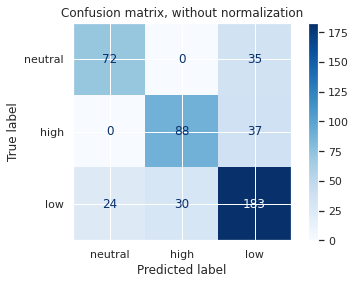

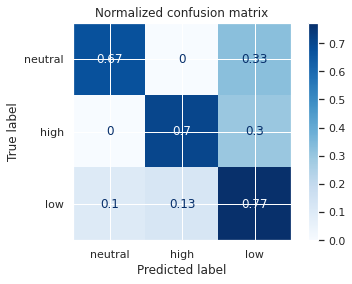

In [ ]:
import numpy as np


#First specify the variabels that we want to study
X= a[['Freedom.to.make.life.choices','Healthy.life.expectancy.at.birth','Life.Ladder','Negative.affect']]
y= a['internet.rank']

#Let's set the random seed so the output of this exercise solution is reproducible
np.random.seed(2042)
#Then split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)
#Now train a softmax linear regression model
from sklearn.linear_model import LogisticRegression
softmax_reg=LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_reg.fit(X_train, y_train)

#Now let’s generate the confusion matrix and calculate some performance metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# get the names of the classes
class_names = ['neutral', 'high', 'low']

y_pred=softmax_reg.predict(X_test)
print(classification_report(y_test,  y_pred, target_names=class_names))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(softmax_reg, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

The accuracy is 73% which is not bad. We can see from the confusion matrix that most of the data falls in the main diagonal from the top left corner to the bottom right corner of the square matrix. This shows that model performs well and there's not many Type I and Type II error.

# Deployment

## Conclusions
The goal of our analysis was to analyze how internet access affects a country’s overall well-being. We explored data on various aspects relating to the happiness of different countries, as well as the percentage of the population who has internet access in these countries. Based on our analysis we make the following conclusions:

##Main Observations
Firstly, we observed strong correlations between the percent of people with internet access and life ladder (overall happiness), log GDP, life expectancy, and social support. Those trends stayed consistent across countries from 2008 to 2019. Internet access and GDP seem to be the primary drivers of the strong positive correlation as they have high Pearson correlation statistics. 

Overall, most countries experienced an increase in general happiness, internet access, and other positive covariates throughout the time span. Many countries with consistent internet use, also had consistently high happiness scores, such as Australia. To take this one step further, we observed certain trends based on access to the internet. For countries with lower GDP and subsequently less infrastructure, increasing internet access makes a huge difference in happiness. For countries with high internet access already, increasing access doesn't have a significant effect on overall happiness. 

##Future Directions
Based on our insights, we can make the following recommendations to clients interested in increasing global happiness generally, and through internet access.

Philanthropic organizations interested in making a difference should focus on distributing funds, infrastructure, and other necessities for internet access to those with the lowest current access. Increasing access from 10% to 20% contributes more to national happiness than from 80% to 90%. Thus, instead of making a large donation to one’s alma mater in the US or even the public school system, the biggest difference will be made by donating that same amount to a school in a country with lower overall access to the internet and overall happiness.

When looking to increase internet access, organizations should consider this 2013 analysis of internet access and use in 11 African countries by Stork, Calandro, and Gillwald. This analysis found that smartphones, when combined with prepaid data plans, are an easy to learn and relatively inexpensive way to address the divide in internet access. A similar analysis in Thailand suggests that mobile internet could be an alternative technology to bridge the digital divide (Srinuan). Rather than relying on wired infrastructure or public access points such as internet cafés, schools, and libraries, it may be fruitful to invest in incentivizing competition for mobile phones and prepaid phone plans in these countries with lower internet access and investigate the effects. 

Moving forward, we would like to further research the correlation between education and increased happiness from internet access. We hypothesize that internet access is most closely related to general happiness when accompanied by better education systems. Additionally, we are interested in acquiring qualitative data surrounding quality of life.


##  Inquiries
For inquiries about this project, please contact Biddy Bi (bix@lafayette.edu), Sam Iacavazzi (iacavazs@lafayette.edu), Shirley Liu (liushi@lafayette.edu), or Natalie Schmit (schmitn@lafayette.edu). 


## Acknowledgements
- Office of Policy Development & Research, Community Development and the Digital Divide, Fall 2016
- The San Diego Foundation, What is the Digital Divide?, September 2020
- Srinuan, C., Srinuan, P., & Bohlin, E. (2012). An analysis of mobile Internet access in Thailand: Implications for bridging the digital divide. Telematics and Informatics, 29(3), 254-262. https://doi.org/10.1016/j.tele.2011.10.003
Stork, C., Calandro, E., & Gillwad, A. (2013). 
- Internet going mobile: internet access and use in 11 African countries. info, 15(5), 34-51. https://doi.org/10.1108/info-05-2013-0026




